# Introduction

Diabetes has become a more and more severe problem. According to the following  <a href="https://www.diabetes.org/resources/statistics/statistics-about-diabetes#:~:text=Prevalence%3A%20In%202018%2C%2034.2%20million,of%20the%20population%2C%20had%20diabetes.&text=Undiagnosed%3A%20Of%20the%2034.2%20million,and%207.3%20million%20were%20undiagnosed"> website </a>, more than 10% of Americans had diabetes in 2018. 

In 2017 alone, diabetes caused more than 200,000 deaths in America. In the same year, the total cost to treat diabetes is $327 billion.

All these alarming numbers urge scientists to build more precise models to predict diabetes so that appropriate actions could be taken to combat the disease. That is precisely the aim of our project. We will use a public dataset to train and evaluate several machine learning models to predict diabetes. More precisely, we will use the data set "
Pima Indians Diabetes Database"-which is available on <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database" > Kaggle </a> to find factors that could be correlated with diabetes and build our machine learning models. 





# Part 1: Load the dataset and essential libraries

First we load some libraries that we will use in our problem.

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.pylabtools import figsize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import classification_report
import sklearn
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import svm
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from keras.wrappers.scikit_learn import KerasClassifier

from keras.models import Sequential

from keras.optimizers import Adam




Next, we load the dataset that we will use to train and test our models.

In [150]:
raw_df=pd.read_csv('diabetes.csv')
raw_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let us take an overview of this dataset.

In [151]:
raw_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We see that some features contain 0 which clearly does not make sense. This indicates that missing values are replaced by 0. We replace 0 value by NaN.


In [152]:
raw_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = raw_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Let us see the number of missing values for each of these features.

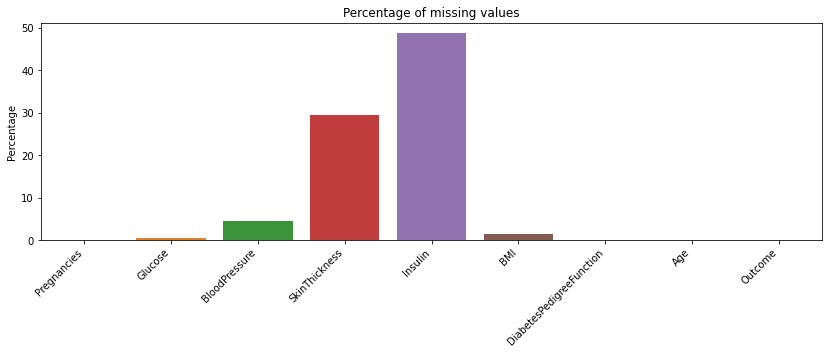

In [153]:
figsize(14,4)
features=raw_df.columns
missing_data=pd.DataFrame(index=features, columns=['Missing_values'])
for i in range(len(features)):
    missing_data.iloc[i]=100*raw_df[features[i]].isnull().sum()/len(raw_df)
bar=sns.barplot(x=missing_data.index, y=missing_data['Missing_values'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylabel("Percentage")
plt.title("Percentage of missing values")
plt.show()

We see that Skin Thickness and Insulin variables miss a significant amount of values. 

As NaN values will pose a serious problem to our data analysis as well as the accuracy of our models, we need to replace NaN values by meaningful values. There are several approach to this common. For our project, we will use the mean for each class of the Outcome variable to replace missing values of the same class.

In [154]:
def replace_NaN(df):
    df_0=df[df['Outcome']==0]
    df_1=df[df['Outcome']==1]
    df_0=df_0.fillna(df_0.mean())
    df_1=df_1.fillna(df_1.mean())
    df=pd.concat([df_0, df_1])
    df=df.sort_index()
    return df

We use this function to replace missing values.

In [155]:
df=replace_NaN(raw_df)
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
210,2,81.0,60.0,22.0,130.287879,27.7,0.290,25,0
581,6,109.0,60.0,27.0,130.287879,25.0,0.206,27,0
394,4,158.0,78.0,33.0,206.846154,32.9,0.803,31,1
387,8,105.0,100.0,36.0,206.846154,43.3,0.239,45,1
169,3,111.0,90.0,12.0,78.000000,28.4,0.495,29,0


# Part 2: Exploratory data analysis

In this part, we will do some exploratory data analysis in order to gain deeper insights on our dataset. 

First, since we have a relatively small set of variables, we can create a pair plot to have a global understanding of our variables and their relationship.


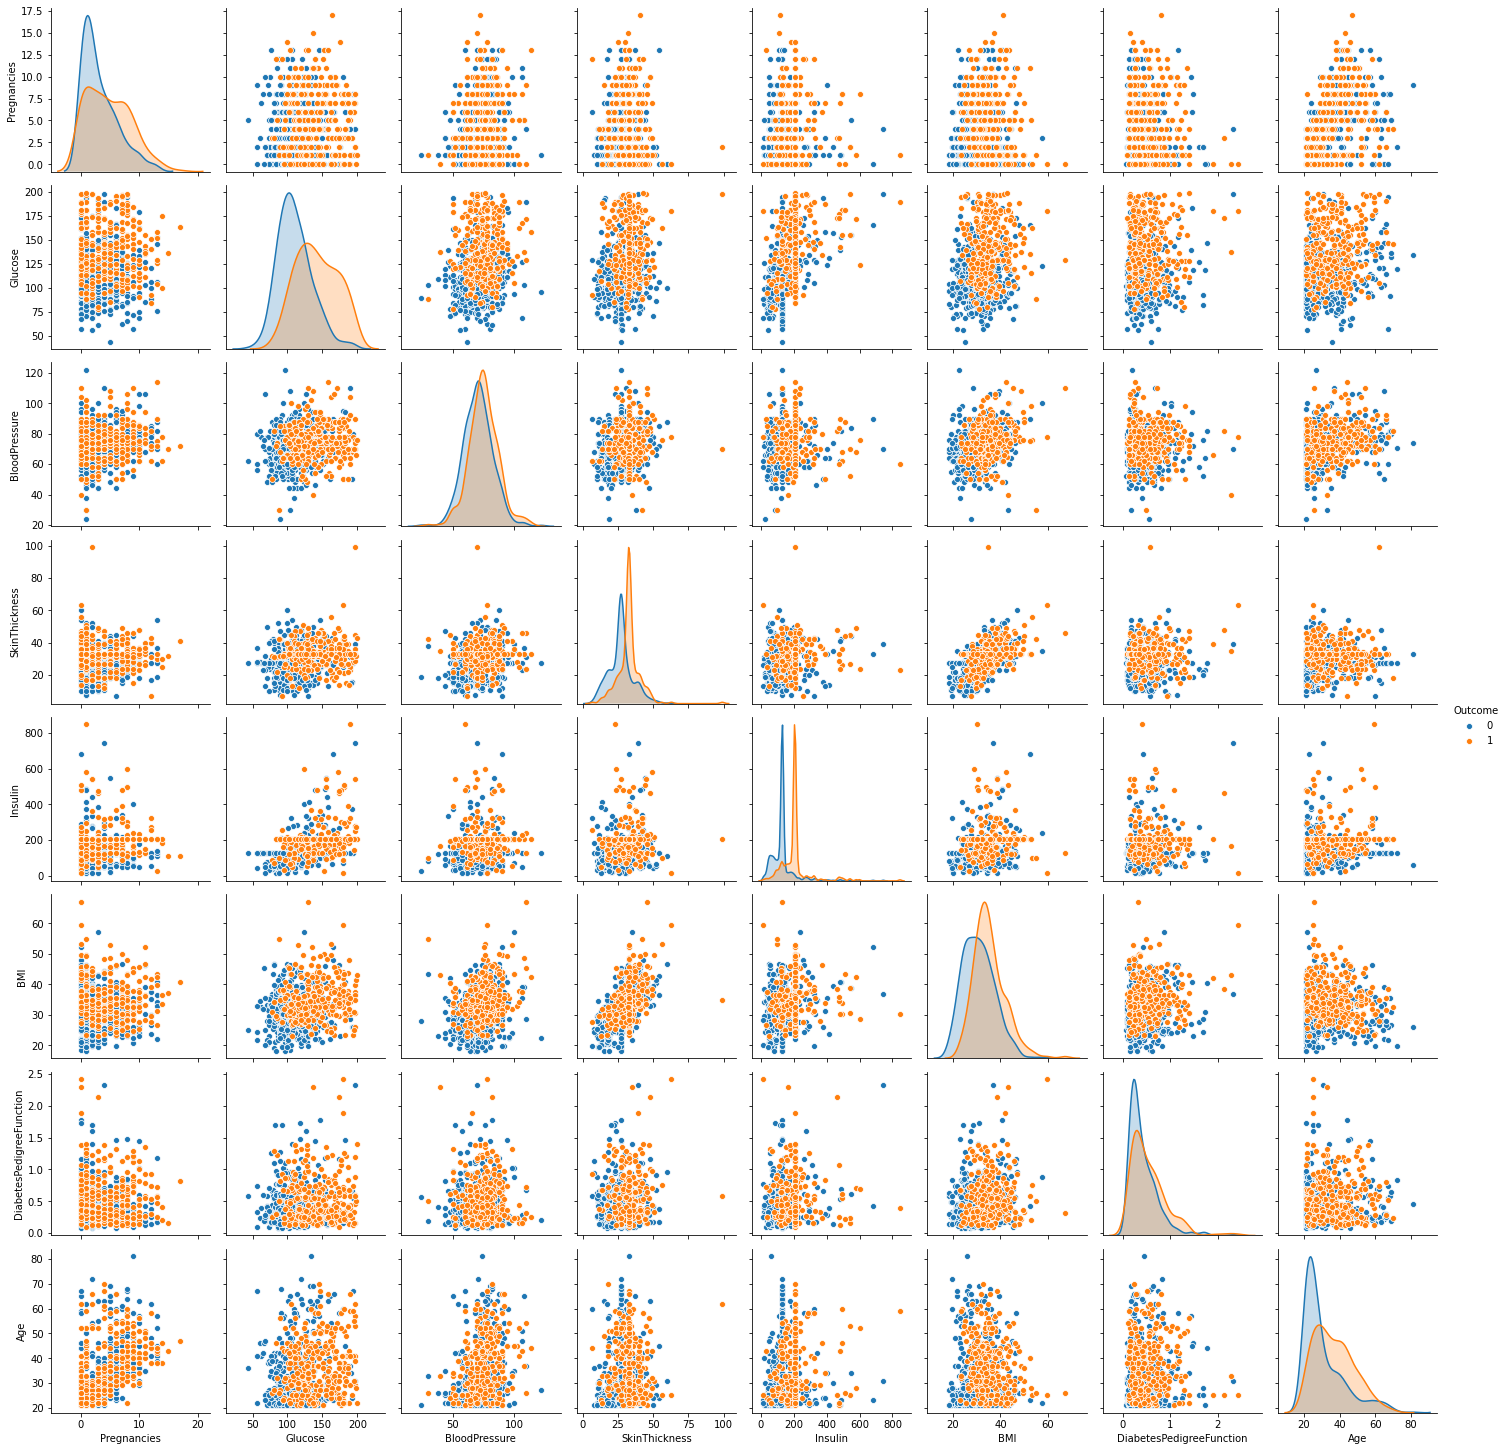

In [156]:
sns.pairplot(df, hue='Outcome')
plt.show()

We see that most of the variables do not follow a normal distribution. Furthermore, this plot indicates that

$\bullet$ The two classes' distributions are quite different at the following variables: Pregnancies, Glucose, Age.
 
$\bullet$ Amongst all pairs, only SkinThickness and BMI show a strong linear relationship.

To get a deeper understanding, we will invest these variables in more detail.

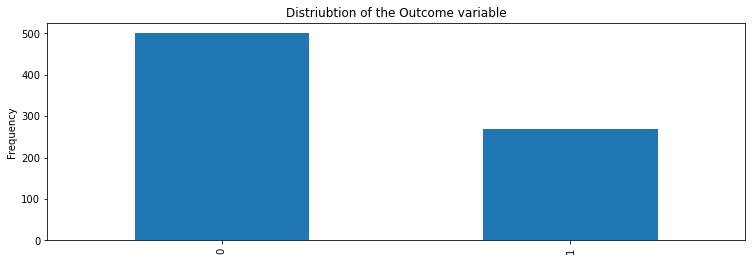

In [157]:
figsize(12.5,4)
df['Outcome'].value_counts().plot(kind='bar')
plt.title("Distriubtion of the Outcome variable")
plt.ylabel('Frequency')
plt.show()

We see that there are fewer people with diabetes than people without diabetes in this dataset. However, the data is not significantly skewed. 

Next, let us compare the number of pregnancies between people with and without diabetes. 

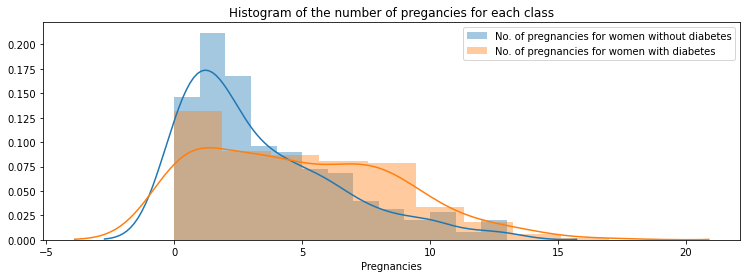

In [158]:
#plot the histogram of the number of pregnancies for each class 
figsize(12.5,4)
pregnancy_0=df[df['Outcome']==0]['Pregnancies'] #filter out class 0 
pregnancy_1=df[df['Outcome']==1]['Pregnancies'] #fillter out class 1
sns.distplot(pregnancy_0, label='No. of pregnancies for women without diabetes')
sns.distplot(pregnancy_1, label='No. of pregnancies for women with diabetes')
plt.title('Histogram of the number of pregancies for each class')
plt.legend()
plt.show()

We see a general trend that women without diabetes often have less then 4 children. 

What about Glucose level?

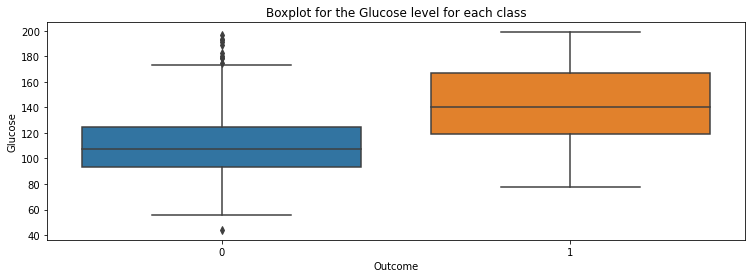

In [159]:
figsize(12.5,4 )
sns.boxplot(data=df, x=df['Outcome'], y=df['Glucose'])
plt.title('Boxplot for the Glucose level for each class')
plt.show()

We see a clear pattern here that women with diabetes are likely to have a higher glucose level. We also see that amongst women who do not have diabetes, there are a few who have a very high level of glucose (outliers.) In other words, a higher level of glucose might indicate a higher risk of diabetes; this sole factor is not enough to decide whether a woman has diabetes or not.

What about the blood pressure level?

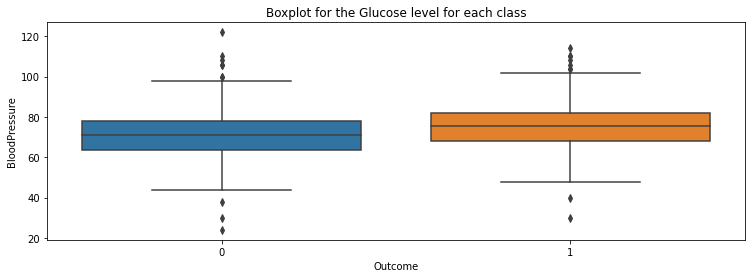

In [160]:
figsize(12.5,4 )
sns.boxplot(data=df, x=df['Outcome'], y=df['BloodPressure'])
plt.title('Boxplot for the Glucose level for each class')
plt.show()

We see that while women with diabetes tend to have higher blood pressure, the difference in blood pressure between the two classes is not as straightforward as the difference in Glucose level. These consistent differences might suggest that there is a correlation between glucose level and blood pressure. We can check that by a scatter plot.

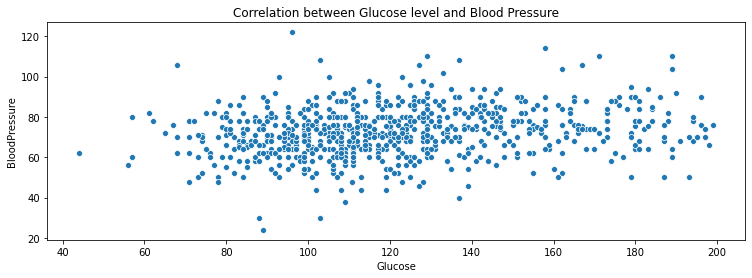

In [161]:
figsize(12.5,4)
sns.scatterplot(x=df['Glucose'], y=df['BloodPressure'])
plt.title("Correlation between Glucose level and Blood Pressure")
plt.show()

Unlike our prior belief, there is a rather weak relation between Glucose Level and Blood Pressure.

Insuline should play an important role in detecting diabetes. Let us compare the distributions of the two outcomes.

In [162]:
df.groupby('Outcome')['Insulin'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,130.287879,74.400559,15.0,95.0,130.287879,130.287879,744.0
1,268.0,206.846154,92.237987,14.0,175.0,206.846154,206.846154,846.0


The data shows that women without diabetes have a significantly lower level of insulin on average.

Let us take a look at the relation between BMI (Body Mass Index) and diabetes.

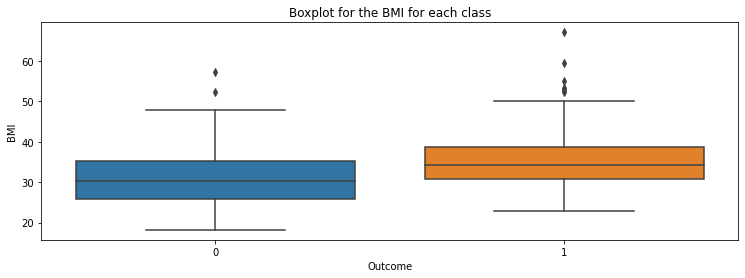

In [163]:
figsize(12.5,4 )
sns.boxplot(data=df, x=df['Outcome'], y=df['BMI'])
plt.title('Boxplot for the BMI for each class')
plt.show()

As we can see from the above plot, women with diabetes have a higher BMI on average. Furthermore, there are more outliers in the group of women with diabetes than the group without diabetes.

Next, we will investigate the interesting variable, "Diabetes Pedigree Function". According to [1], this variable provides a synthesis of the diabetes mellitus history in relatives and the genetic relationship to the subject.

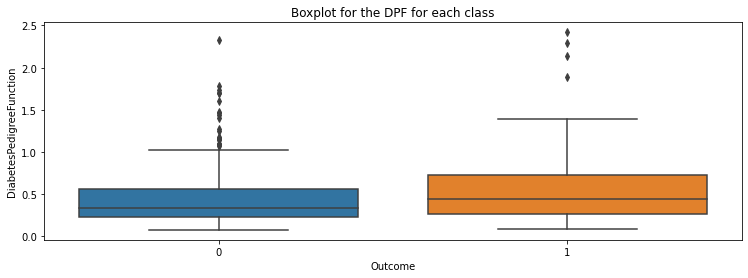

In [164]:
figsize(12.5,4 )
sns.boxplot(data=df, x=df['Outcome'], y=df['DiabetesPedigreeFunction'])
plt.title('Boxplot for the DPF for each class')
plt.show()

In [165]:
#descriptive statistics for the DPF of each class
df.groupby('Outcome')['DiabetesPedigreeFunction'].describe()

,count,mean,std,min,25%,50%,75%,max
Outcome,,,,,,,,
0,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
1,268.0,0.550500,0.372354,0.088,0.26250,0.449,0.72800,2.420


As indicated by the above table and plot, women with diabetes tend to have a higher DPF. This kind of makes sense, at least according to this  <a href="https://www.webmd.com/diabetes/diabetes-type-1-genetics"> paper </a>, genetics do a play role in type 1 diabetes. 

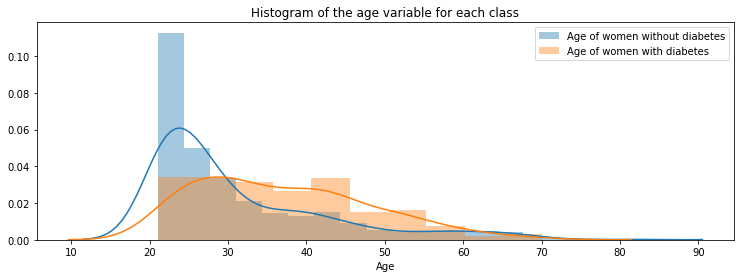

In [166]:
#plot the histogram of the number of pregnancies for each class 
figsize(12.5,4)
age_0=df[df['Outcome']==0]['Age'] #filter out class 0 
age_1=df[df['Outcome']==1]['Age'] #fillter out class 1
sns.distplot(age_0, label='Age of women without diabetes')
sns.distplot(age_1, label='Age of women with diabetes')
plt.title('Histogram of the age variable for each class')
plt.legend()
plt.show()

We see that women without diabetes are generally younger. This makes sense because as time goes on, people are more susceptible to diseases. 

Finally, we will study the correlation matrix. 

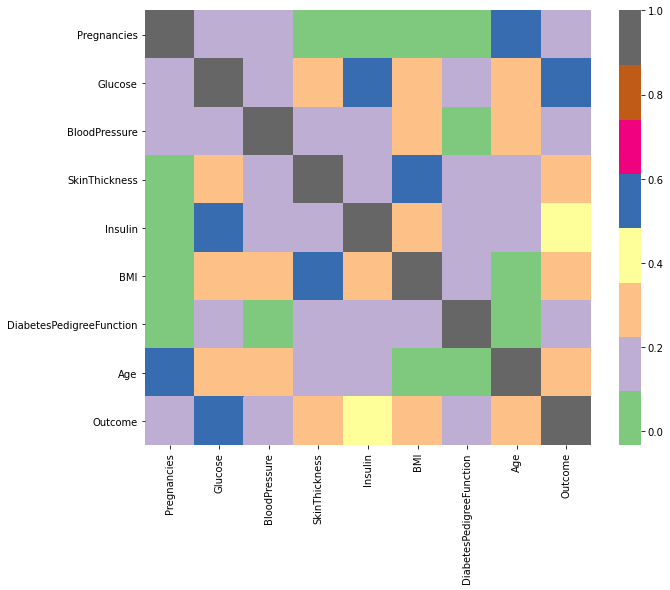

In [167]:
figsize(10, 8)
#compute the correlation matrix
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           cmap='Accent')
plt.show()

Again, we see that there is no pair of variables that shows a strong correlation. 

# Part 3: Data preprocessing

In this section, we will preproces our data to train our models. We will use standard scaler to scaled our data. We will use the following function to automate the data transformation process.

In [177]:
def standard_scale(df):
    """
    given a dataframe df, scale the data
    """
    scaler=StandardScaler().fit(X)
    df_scaled=scaler.transform(X)
    data=pd.DataFrame(df_scaled,columns=df.columns)
    return data  

We use this function to get a data frame of independent variables.

In [178]:
#independent variables
data=standard_scale(df.iloc[:,:-1])
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
344,1.233880,-0.876986,-0.035389,-0.225562,-0.300842,0.633295,0.039635,2.021610
188,1.233880,-0.417098,0.295240,1.093614,-0.484257,-0.661347,0.507754,-0.190672
651,-0.844885,-0.154304,-1.027275,-0.700491,-0.574344,0.196899,-0.017747,-0.531023
646,-0.844885,1.488154,0.129925,-1.373280,-0.146431,-1.315941,-0.075129,-0.020496
336,-1.141852,-0.154304,-0.128185,-0.225562,-0.300842,0.196899,1.389628,0.915469


Finally, we will split our data into a training set and a test set.

In [179]:
y=df['Outcome'] # dependent variables

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.33, random_state=42)


Let us check the distriubtion of the Outcome variable in each set.

In [180]:
#distriubtion of the Outcome variable in the training set
y_train.value_counts()

0    332
1    182
Name: Outcome, dtype: int64

In [181]:
#distriubtion of the Outcome variable in the test set
y_test.value_counts()

0    168
1     86
Name: Outcome, dtype: int64

We se that we have enough samples of both classes in each set. We are ready to build our models.

# Part 4: Machine Learning Models

Before we build our models, one important questions that we have to ask ourselves is

$\bullet$ What is the best metrics for our problem?

For this particular problem, the most important thing to correctly predict someone with diabetes. In other words, we  will try to maximize the recall score which is defined as 

$$\text{Recall}= \frac{\text{Number of people correctly predicted to have diabetes}}{\text{Number of people who have diabetes}} =\frac{TP}{TP+FN}$$

We remark that by maximizing the recall score, we might make some false positive predictions; that is we predict that certain women have diabetes while in fact they do not. In other words, there will be a trade-offs between recall scorea and precision score-which is defined as 

$$\text{Precision}= \frac{\text{Number of people correctly predicted to have diabetes}}{\text{Number of people predicted to have diabetes}} =\frac{TP}{TP+FP}$$

We will keep that in mind in order to balance these two scores. 

We will use the following function to automate our process. 

In [182]:
# An automated process for training a logistic regression model
def diabetes_prediction(X,y, model):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    #fit the model to the training set 
    logit_model=model.fit(X_train, y_train)
    
    #use the trained model to make predictions
    
    train_prediction=logit_model.predict(X_train)
    test_prediction=logit_model.predict(X_test)
    
    #metrics for the train set
    train_recall = sklearn.metrics.recall_score(y_train, train_prediction)
    train_precision = sklearn.metrics.precision_score(y_train, train_prediction)
    d_train={'Training set precision_score': train_precision, 'Training set recall_score': train_recall}
    
    #metrics for the test set
    test_recall = sklearn.metrics.recall_score(y_test, test_prediction)
    test_precision = sklearn.metrics.precision_score(y_test, test_prediction)
    d_test={'Test set precision_score': test_precision, 'Test set recall_score': test_recall}
    
    #confussion matrix on the training set 
    confusion_matrix_train=sklearn.metrics.confusion_matrix(y_train, train_prediction)
    #confusion matrix on the test set
    confusion_matrix_test=sklearn.metrics.confusion_matrix(y_test, test_prediction)

    #combine the two results 
    d={**d_train, **d_test}
    result=pd.Series(d)
    figsize(12.5,4)
    f, (ax1, ax2) = plt.subplots(1, 2)

    ax1=sns.heatmap(confusion_matrix_train, annot=True, fmt='d', ax=ax1, cmap='Accent') 
    ax1.set_title('Confusion matrix for training set')
    ax1.set_xlabel('Predicted class')
    ax1.set_ylabel('True class')

    sns.heatmap(confusion_matrix_test, annot=True, fmt='d', ax=ax2, cmap='Accent')
    ax2.set_title('Confusion matrix for test set')
    ax2.set_xlabel('Predicted class')
    ax2.set_ylabel('True class')

    plt.show()
    print(result)

# Part 4.1: Logistic Regression Model

We first build a logistic regression model.

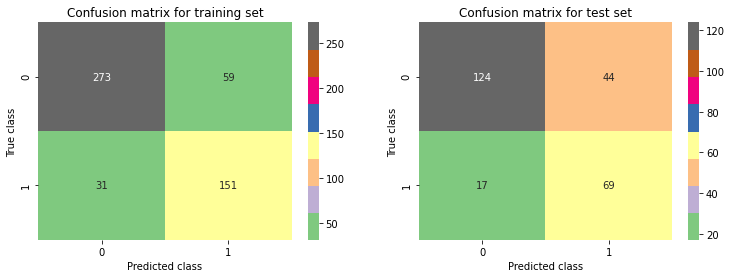

Training set precision_score    0.719048
Training set recall_score       0.829670
Test set precision_score        0.610619
Test set recall_score           0.802326
dtype: float64


In [183]:
#logistic regression model
X=data
y=df['Outcome']
#using weights to put higher penalty on false negative errors
weights=weights={1: 2, 0: 1} 

model=LogisticRegression(class_weight=weights)
diabetes_prediction(X,y, model)

This is not too bad because 

$\bullet$ The precision and recall scores are rather consistent on the training and test sets. That means, we are not overfitting the data. 

$\bullet$ Even though the model is rather simple, it already able to correctly identify at least 80% of women with diabetes. 

$\bullet$ The number of women incorrectly predicted to have diabetes are in a reasonable range.

This is a good start. Can we do better?

This is a good start. Can we do better?

# Part 4.2: KNN models

Another type of model that we could try is KNN. This model seems promising because women with similar traits might have similar outcomes (diabetes or not.) First, we need to find the most appropriate hyperparameter for the number of neighborhoods that we will use to train our model. We use the following line of codes to help us visually find $k$.

In [184]:
def recall_scores(X,y, model):  
    """
    compute the recall score and the training and test sets
    """
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    #fit the model to the training set 
    model=model.fit(X_train, y_train)
    
    #use the trained model to make predictions 
    train_prediction=model.predict(X_train)
    test_prediction=model.predict(X_test)
    
    #recall score for the training set
    train_recall = sklearn.metrics.recall_score(y_train, train_prediction)
    
    #recall score for the test set
    test_recall = sklearn.metrics.recall_score(y_test, test_prediction)
    
    return [train_recall, test_recall]


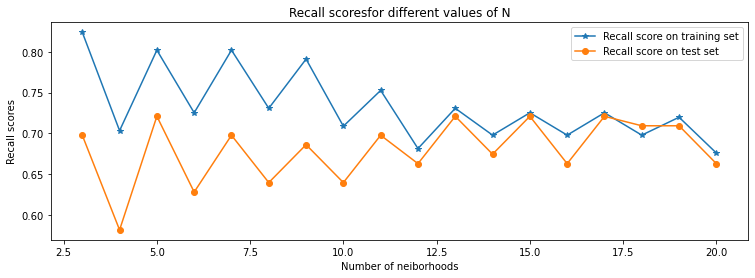

In [185]:
#KNN model with n in [3,20]
X=data
y=df['Outcome']
result=[]

for i in range(3,21):
    model=KNeighborsClassifier(n_neighbors=i)
    result.append(recall_scores(X,y, model))
 
figsize(12.5,4)
neibors=range(3,21)
result_train=[item[0] for item in result]
result_test=[item[1] for item in result]
plt.plot(neibors, result_train, marker='*', label='Recall score on training set')
plt.plot(neibors, result_test, marker='o', label='Recall score on test set')
plt.xlabel("Number of neiborhoods")
plt.ylabel("Recall scores")
plt.title("Recall scoresfor different values of N")
plt.legend()
plt.show()   

The best hyperparameter for KNN is 13. Let us use this number to train our KNN model.

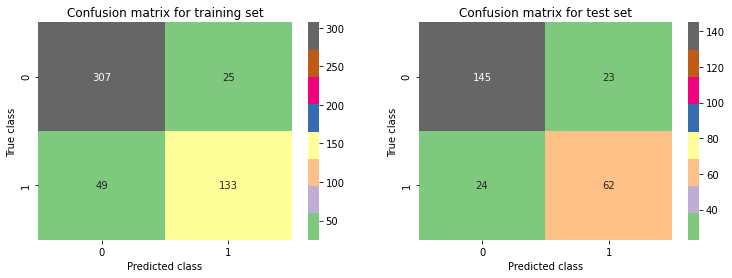

Training set precision_score    0.841772
Training set recall_score       0.730769
Test set precision_score        0.729412
Test set recall_score           0.720930
dtype: float64


In [186]:
#KNN classifier model
X=data
y=df['Outcome']
#using weights to put higher penalty on false negative errors

model=KNeighborsClassifier(n_neighbors=13)
diabetes_prediction(X,y, model)

We see that for this KNN model, the precision scores are consistently higher than the previous model. However, the recall scores are a bit lower. 

# Part 4.3: Tree models

Another type of model that is reasonable for this problem is the tree model. It has the following advantages. 

$\bullet$ It is easy to interpret the result. 

$\bullet$ It can tell us which features are most important in detecting diabetes. 

We will use a GridSearch to tune in the hyparameters in our tree models.

In [187]:
tree_model = DecisionTreeClassifier()

#the set of hyperparameters that we will tune in
param_grid = {'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_leaf':np.arange(1,20)}
weights = [{1:1,0:1}, {1:2,0:1}, {1:4,0:1}, 
           {1:1,0:2}, {1:1, 0:4}]

param_grid['class_weight']=weights

#initiate the GridSearch with 5-fold cross validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='recall')

#fit this GridSearch to the training set 

grid_search.fit(X_train, y_train)

#print the best parameters

print("Best Paramerers:",grid_search.best_params_)


Best Paramerers: {'class_weight': {1: 4, 0: 1}, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 12}


Let us build a tree model with this set of parameters.

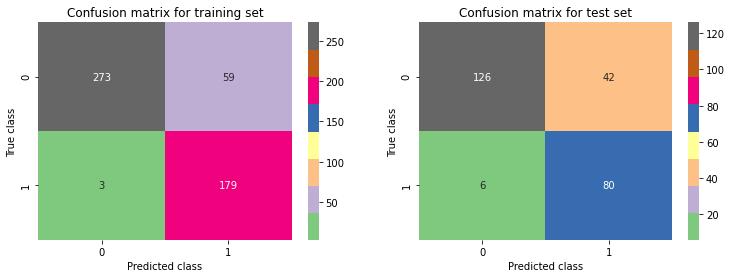

Training set precision_score    0.752101
Training set recall_score       0.983516
Test set precision_score        0.655738
Test set recall_score           0.930233
dtype: float64


In [188]:
#Tree classifier model
X=data
y=df['Outcome']
#using weights to put higher penalty on false negative errors

model=DecisionTreeClassifier(class_weight ={1: 4, 0: 1}, criterion= 'entropy', 
                             max_depth= 5, min_samples_leaf=12)
diabetes_prediction(X,y, model)

This is pretty good! The recall scores are both very high on both training and test sets while the precision scores are reasonably good. As we mentioned earlier, a by-product is the score for each feature-which tells us the set of features that are most important in detecting diabetes.

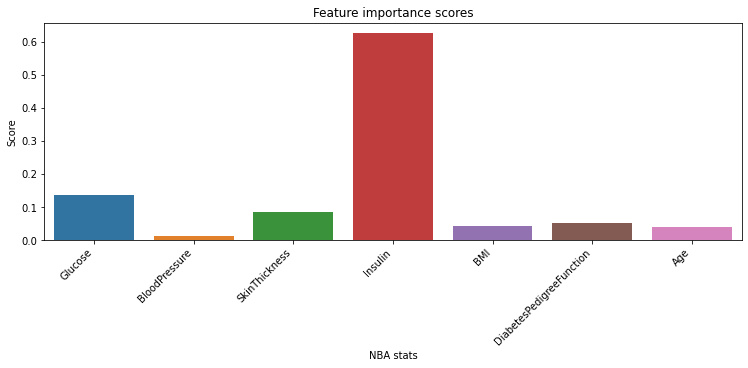

In [189]:
importance= model.feature_importances_        
importance_df=pd.DataFrame(data=importance, index=X_train.columns, columns=['score'])
importance_df=importance_df[importance_df['score']>0]
figsize(12.5,4)
bar=sns.barplot(x=importance_df.index, y=importance_df['score'])
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.xlabel("NBA stats")
plt.ylabel('Score')
plt.title("Feature importance scores")
plt.show()

We conclude that Glucose, Insulin, Skin Thickness, and Age are most important factors in detecting diabetes. 

# Part 4.4: Deep learning models

In the oringinal paper [1], the author built neural network models to solve this problem. Note that, this paper was published a quite long time ago, in 1988. With recent developments in computational powers and deep learning, we probably could possibly build better deep learning models. Let us do that.

We first fine-tune our neural network hyperparameters. The following function is an adjustment of the function "build_function" on page 320 of [3] 

In [262]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def build_model(n_hidden=1, n_neurons=16, learning_rate=0.1,
               input_shape=[8]):
    #neural network structure 
    model=Sequential() 
    model.add(keras.layers.InputLayer(input_shape=input_shape)) #input layer
    
    #hidden layers 
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
        
    #output layers     
    model.add(keras.layers.Dense(1, activation='sigmoid'))    
    
    #compile the model
    adam = Adam(lr = learning_rate)

    model.compile(loss="binary_crossentropy", optimizer = adam, metrics = [recall_m, 'acc'])
    
    return model

Note that in the above models, there are several hyperparameters that we want optimize.

$\bullet$ The number of hidden layers. 

$\bullet$ The number of neurons on each hidden layer.

$\bullet$ The learning rate.

We can run a randomize GridSearch in order to find the best combination of these variables.


In [263]:
model=KerasClassifier(build_model)
param_distribs={"n_hidden":[1,2,3,4],
               "n_neurons": [8, 12, 16, 20, 24,28, 32],
               "learning_rate": [0.001, 0.005, 0.01, 0.05, 0.1], 
               "epochs":[50, 60, 70, 80, 90, 100]}
grid_search_cv=RandomizedSearchCV(model, param_distribs, cv=5, n_iter=10)
grid_search_cv.fit(X_train, y_train)

Epoch 1/90
13/13 [==============================] - 0s 803us/step - loss: 0.6627 - recall_m: 0.4239 - acc: 0.6229
Epoch 2/90
13/13 [==============================] - 0s 676us/step - loss: 0.6113 - recall_m: 0.3639 - acc: 0.7056
Epoch 3/90
13/13 [==============================] - 0s 960us/step - loss: 0.5682 - recall_m: 0.3735 - acc: 0.7202
Epoch 4/90
13/13 [==============================] - 0s 764us/step - loss: 0.5266 - recall_m: 0.4484 - acc: 0.7445
Epoch 5/90
13/13 [==============================] - 0s 797us/step - loss: 0.4891 - recall_m: 0.5700 - acc: 0.7737
Epoch 6/90
13/13 [==============================] - 0s 786us/step - loss: 0.4541 - recall_m: 0.6833 - acc: 0.8005
Epoch 7/90
13/13 [==============================] - 0s 620us/step - loss: 0.4281 - recall_m: 0.7223 - acc: 0.8127
Epoch 8/90
13/13 [==============================] - 0s 795us/step - loss: 0.4070 - recall_m: 0.7367 - acc: 0.8248
Epoch 9/90
13/13 [==============================] - 0s 831us/step - loss: 0.3929 - recal

13/13 [==============================] - 0s 830us/step - loss: 0.1382 - recall_m: 0.9332 - acc: 0.9586
Epoch 73/90
13/13 [==============================] - 0s 889us/step - loss: 0.1353 - recall_m: 0.9421 - acc: 0.9586
Epoch 74/90
13/13 [==============================] - 0s 763us/step - loss: 0.1331 - recall_m: 0.9432 - acc: 0.9635
Epoch 75/90
13/13 [==============================] - 0s 691us/step - loss: 0.1302 - recall_m: 0.9404 - acc: 0.9659
Epoch 76/90
13/13 [==============================] - 0s 717us/step - loss: 0.1278 - recall_m: 0.9456 - acc: 0.9659
Epoch 77/90
13/13 [==============================] - 0s 622us/step - loss: 0.1262 - recall_m: 0.9504 - acc: 0.9635
Epoch 78/90
13/13 [==============================] - 0s 585us/step - loss: 0.1229 - recall_m: 0.9342 - acc: 0.9684
Epoch 79/90
13/13 [==============================] - 0s 637us/step - loss: 0.1224 - recall_m: 0.9422 - acc: 0.9708
Epoch 80/90
13/13 [==============================] - 0s 617us/step - loss: 0.1192 - recall_m

13/13 [==============================] - 0s 609us/step - loss: 0.1378 - recall_m: 0.9179 - acc: 0.9489
Epoch 53/90
13/13 [==============================] - 0s 847us/step - loss: 0.1334 - recall_m: 0.9139 - acc: 0.9562
Epoch 54/90
13/13 [==============================] - 0s 689us/step - loss: 0.1319 - recall_m: 0.9250 - acc: 0.9513
Epoch 55/90
13/13 [==============================] - 0s 639us/step - loss: 0.1280 - recall_m: 0.9173 - acc: 0.9513
Epoch 56/90
13/13 [==============================] - 0s 602us/step - loss: 0.1265 - recall_m: 0.9268 - acc: 0.9586
Epoch 57/90
13/13 [==============================] - 0s 703us/step - loss: 0.1250 - recall_m: 0.9476 - acc: 0.9611
Epoch 58/90
13/13 [==============================] - 0s 624us/step - loss: 0.1214 - recall_m: 0.9335 - acc: 0.9562
Epoch 59/90
13/13 [==============================] - 0s 632us/step - loss: 0.1213 - recall_m: 0.9322 - acc: 0.9611
Epoch 60/90
13/13 [==============================] - 0s 694us/step - loss: 0.1172 - recall_m

13/13 [==============================] - 0s 699us/step - loss: 0.2228 - recall_m: 0.8865 - acc: 0.9197
Epoch 33/90
13/13 [==============================] - 0s 651us/step - loss: 0.2241 - recall_m: 0.8994 - acc: 0.9319
Epoch 34/90
13/13 [==============================] - 0s 707us/step - loss: 0.2172 - recall_m: 0.9313 - acc: 0.9246
Epoch 35/90
13/13 [==============================] - 0s 718us/step - loss: 0.2133 - recall_m: 0.8763 - acc: 0.9246
Epoch 36/90
13/13 [==============================] - 0s 640us/step - loss: 0.2054 - recall_m: 0.9198 - acc: 0.9319
Epoch 37/90
13/13 [==============================] - 0s 734us/step - loss: 0.2001 - recall_m: 0.9146 - acc: 0.9367
Epoch 38/90
13/13 [==============================] - 0s 633us/step - loss: 0.1956 - recall_m: 0.9208 - acc: 0.9416
Epoch 39/90
13/13 [==============================] - 0s 655us/step - loss: 0.1891 - recall_m: 0.9099 - acc: 0.9367
Epoch 40/90
13/13 [==============================] - 0s 719us/step - loss: 0.1855 - recall_m

13/13 [==============================] - 0s 718us/step - loss: 0.3483 - recall_m: 0.7358 - acc: 0.8418
Epoch 13/90
13/13 [==============================] - 0s 602us/step - loss: 0.3363 - recall_m: 0.7548 - acc: 0.8516
Epoch 14/90
13/13 [==============================] - 0s 715us/step - loss: 0.3272 - recall_m: 0.7648 - acc: 0.8589
Epoch 15/90
13/13 [==============================] - 0s 701us/step - loss: 0.3178 - recall_m: 0.7579 - acc: 0.8613
Epoch 16/90
13/13 [==============================] - 0s 656us/step - loss: 0.3105 - recall_m: 0.7680 - acc: 0.8589
Epoch 17/90
13/13 [==============================] - 0s 612us/step - loss: 0.2999 - recall_m: 0.7618 - acc: 0.8589
Epoch 18/90
13/13 [==============================] - 0s 640us/step - loss: 0.2914 - recall_m: 0.7867 - acc: 0.8613
Epoch 19/90
13/13 [==============================] - 0s 672us/step - loss: 0.2832 - recall_m: 0.7863 - acc: 0.8686
Epoch 20/90
13/13 [==============================] - 0s 599us/step - loss: 0.2773 - recall_m

13/13 [==============================] - 0s 609us/step - loss: 0.0342 - recall_m: 0.9945 - acc: 0.9976
Epoch 84/90
13/13 [==============================] - 0s 720us/step - loss: 0.0342 - recall_m: 0.9930 - acc: 0.9976
Epoch 85/90
13/13 [==============================] - 0s 639us/step - loss: 0.0321 - recall_m: 0.9915 - acc: 0.9976
Epoch 86/90
13/13 [==============================] - 0s 607us/step - loss: 0.0290 - recall_m: 1.0000 - acc: 1.0000
Epoch 87/90
13/13 [==============================] - 0s 647us/step - loss: 0.0266 - recall_m: 1.0000 - acc: 1.0000
Epoch 88/90
13/13 [==============================] - 0s 662us/step - loss: 0.0256 - recall_m: 1.0000 - acc: 1.0000
Epoch 89/90
13/13 [==============================] - 0s 634us/step - loss: 0.0235 - recall_m: 1.0000 - acc: 1.0000
Epoch 90/90
4/4 [==============================] - 0s 807us/step - loss: 0.9257 - recall_m: 0.7262 - acc: 0.8058
Epoch 1/90
13/13 [==============================] - 0s 806us/step - loss: 0.6978 - recall_m: 0

13/13 [==============================] - 0s 646us/step - loss: 0.1466 - recall_m: 0.9277 - acc: 0.9442
Epoch 64/90
13/13 [==============================] - 0s 670us/step - loss: 0.1455 - recall_m: 0.9375 - acc: 0.9515
Epoch 65/90
13/13 [==============================] - 0s 585us/step - loss: 0.1387 - recall_m: 0.9372 - acc: 0.9466
Epoch 66/90
13/13 [==============================] - 0s 649us/step - loss: 0.1407 - recall_m: 0.9485 - acc: 0.9563
Epoch 67/90
13/13 [==============================] - 0s 668us/step - loss: 0.1357 - recall_m: 0.9186 - acc: 0.9515
Epoch 68/90
13/13 [==============================] - 0s 620us/step - loss: 0.1308 - recall_m: 0.9335 - acc: 0.9539
Epoch 69/90
13/13 [==============================] - 0s 576us/step - loss: 0.1296 - recall_m: 0.9284 - acc: 0.9587
Epoch 70/90
13/13 [==============================] - 0s 1ms/step - loss: 0.1211 - recall_m: 0.9577 - acc: 0.9660
Epoch 71/90
13/13 [==============================] - 0s 718us/step - loss: 0.1225 - recall_m: 

13/13 [==============================] - 0s 508us/step - loss: 0.2028 - recall_m: 0.8547 - acc: 0.9051
Epoch 44/60
13/13 [==============================] - 0s 603us/step - loss: 0.1684 - recall_m: 0.9146 - acc: 0.9294
Epoch 45/60
13/13 [==============================] - 0s 515us/step - loss: 0.2319 - recall_m: 0.8548 - acc: 0.9100
Epoch 46/60
13/13 [==============================] - 0s 606us/step - loss: 0.2303 - recall_m: 0.8875 - acc: 0.8978
Epoch 47/60
13/13 [==============================] - 0s 562us/step - loss: 0.2031 - recall_m: 0.8447 - acc: 0.9075
Epoch 48/60
13/13 [==============================] - 0s 557us/step - loss: 0.2098 - recall_m: 0.8933 - acc: 0.9197
Epoch 49/60
13/13 [==============================] - 0s 484us/step - loss: 0.1931 - recall_m: 0.8781 - acc: 0.9100
Epoch 50/60
13/13 [==============================] - 0s 575us/step - loss: 0.1896 - recall_m: 0.8683 - acc: 0.9124
Epoch 51/60
13/13 [==============================] - 0s 574us/step - loss: 0.1778 - recall_m

13/13 [==============================] - 0s 538us/step - loss: 0.2115 - recall_m: 0.9087 - acc: 0.9197
Epoch 54/60
13/13 [==============================] - 0s 530us/step - loss: 0.2232 - recall_m: 0.8996 - acc: 0.9027
Epoch 55/60
13/13 [==============================] - 0s 632us/step - loss: 0.2539 - recall_m: 0.9034 - acc: 0.9100
Epoch 56/60
13/13 [==============================] - 0s 513us/step - loss: 0.2244 - recall_m: 0.9060 - acc: 0.9221
Epoch 57/60
13/13 [==============================] - 0s 539us/step - loss: 0.1873 - recall_m: 0.9551 - acc: 0.9294
Epoch 58/60
13/13 [==============================] - 0s 541us/step - loss: 0.1705 - recall_m: 0.9595 - acc: 0.9270
Epoch 59/60
13/13 [==============================] - 0s 494us/step - loss: 0.1745 - recall_m: 0.8849 - acc: 0.9173
Epoch 60/60
4/4 [==============================] - 0s 794us/step - loss: 0.8969 - recall_m: 0.8083 - acc: 0.8058
Epoch 1/60
13/13 [==============================] - 0s 707us/step - loss: 0.4935 - recall_m: 0

13/13 [==============================] - 0s 641us/step - loss: 0.3678 - recall_m: 0.7756 - acc: 0.8273
Epoch 3/60
13/13 [==============================] - 0s 533us/step - loss: 0.3445 - recall_m: 0.7491 - acc: 0.8491
Epoch 4/60
13/13 [==============================] - 0s 589us/step - loss: 0.3127 - recall_m: 0.8663 - acc: 0.8589
Epoch 5/60
13/13 [==============================] - 0s 715us/step - loss: 0.2806 - recall_m: 0.8265 - acc: 0.8710
Epoch 6/60
13/13 [==============================] - 0s 653us/step - loss: 0.2766 - recall_m: 0.8333 - acc: 0.8710
Epoch 7/60
13/13 [==============================] - 0s 540us/step - loss: 0.2754 - recall_m: 0.8339 - acc: 0.8564
Epoch 8/60
13/13 [==============================] - 0s 591us/step - loss: 0.3074 - recall_m: 0.8573 - acc: 0.8735
Epoch 9/60
13/13 [==============================] - 0s 535us/step - loss: 0.2816 - recall_m: 0.7812 - acc: 0.8686
Epoch 10/60
13/13 [==============================] - 0s 598us/step - loss: 0.2802 - recall_m: 0.869

13/13 [==============================] - 0s 610us/step - loss: 0.2807 - recall_m: 0.8209 - acc: 0.9029
Epoch 13/60
13/13 [==============================] - 0s 513us/step - loss: 0.2579 - recall_m: 0.8315 - acc: 0.8908
Epoch 14/60
13/13 [==============================] - 0s 621us/step - loss: 0.2479 - recall_m: 0.9218 - acc: 0.9126
Epoch 15/60
13/13 [==============================] - 0s 553us/step - loss: 0.2777 - recall_m: 0.8434 - acc: 0.8932
Epoch 16/60
13/13 [==============================] - 0s 616us/step - loss: 0.2790 - recall_m: 0.8592 - acc: 0.8981
Epoch 17/60
13/13 [==============================] - 0s 515us/step - loss: 0.2590 - recall_m: 0.8473 - acc: 0.9029
Epoch 18/60
13/13 [==============================] - 0s 548us/step - loss: 0.2934 - recall_m: 0.8498 - acc: 0.8932
Epoch 19/60
13/13 [==============================] - 0s 547us/step - loss: 0.2543 - recall_m: 0.8570 - acc: 0.9053
Epoch 20/60
13/13 [==============================] - 0s 532us/step - loss: 0.2346 - recall_m

13/13 [==============================] - 0s 688us/step - loss: 0.1778 - recall_m: 0.9363 - acc: 0.9343
Epoch 23/60
13/13 [==============================] - 0s 651us/step - loss: 0.1655 - recall_m: 0.8986 - acc: 0.9148
Epoch 24/60
13/13 [==============================] - 0s 648us/step - loss: 0.1513 - recall_m: 0.9262 - acc: 0.9392
Epoch 25/60
13/13 [==============================] - 0s 682us/step - loss: 0.1477 - recall_m: 0.9422 - acc: 0.9367
Epoch 26/60
13/13 [==============================] - 0s 628us/step - loss: 0.1461 - recall_m: 0.9093 - acc: 0.9319
Epoch 27/60
13/13 [==============================] - 0s 678us/step - loss: 0.1493 - recall_m: 0.9033 - acc: 0.9367
Epoch 28/60
13/13 [==============================] - 0s 660us/step - loss: 0.2268 - recall_m: 0.8803 - acc: 0.9148
Epoch 29/60
13/13 [==============================] - 0s 637us/step - loss: 0.2579 - recall_m: 0.9118 - acc: 0.9027
Epoch 30/60
13/13 [==============================] - 0s 664us/step - loss: 0.2334 - recall_m

13/13 [==============================] - 0s 693us/step - loss: 0.0979 - recall_m: 0.9489 - acc: 0.9611
Epoch 33/60
13/13 [==============================] - 0s 633us/step - loss: 0.1000 - recall_m: 0.9682 - acc: 0.9513
Epoch 34/60
13/13 [==============================] - 0s 615us/step - loss: 0.1095 - recall_m: 0.9574 - acc: 0.9611
Epoch 35/60
13/13 [==============================] - 0s 689us/step - loss: 0.1158 - recall_m: 0.9616 - acc: 0.9562
Epoch 36/60
13/13 [==============================] - 0s 715us/step - loss: 0.1041 - recall_m: 0.9660 - acc: 0.9611
Epoch 37/60
13/13 [==============================] - 0s 623us/step - loss: 0.0990 - recall_m: 0.9136 - acc: 0.9538
Epoch 38/60
13/13 [==============================] - 0s 729us/step - loss: 0.0872 - recall_m: 0.9894 - acc: 0.9635
Epoch 39/60
13/13 [==============================] - 0s 665us/step - loss: 0.1119 - recall_m: 0.9457 - acc: 0.9538
Epoch 40/60
13/13 [==============================] - 0s 652us/step - loss: 0.1157 - recall_m

13/13 [==============================] - 0s 647us/step - loss: 0.0448 - recall_m: 0.9765 - acc: 0.9805
Epoch 43/60
13/13 [==============================] - 0s 644us/step - loss: 0.0827 - recall_m: 0.9582 - acc: 0.9659
Epoch 44/60
13/13 [==============================] - 0s 628us/step - loss: 0.1406 - recall_m: 0.9140 - acc: 0.9513
Epoch 45/60
13/13 [==============================] - 0s 658us/step - loss: 0.1218 - recall_m: 0.8781 - acc: 0.9392
Epoch 46/60
13/13 [==============================] - 0s 694us/step - loss: 0.1252 - recall_m: 0.9404 - acc: 0.9465
Epoch 47/60
13/13 [==============================] - 0s 735us/step - loss: 0.1179 - recall_m: 0.9204 - acc: 0.9611
Epoch 48/60
13/13 [==============================] - 0s 605us/step - loss: 0.0853 - recall_m: 0.9499 - acc: 0.9562
Epoch 49/60
13/13 [==============================] - 0s 644us/step - loss: 0.0498 - recall_m: 0.9702 - acc: 0.9781
Epoch 50/60
13/13 [==============================] - 0s 697us/step - loss: 0.0411 - recall_m

13/13 [==============================] - 0s 711us/step - loss: 0.0170 - recall_m: 0.9868 - acc: 0.9951
Epoch 53/60
13/13 [==============================] - 0s 665us/step - loss: 0.0134 - recall_m: 0.9864 - acc: 0.9951
Epoch 54/60
13/13 [==============================] - 0s 639us/step - loss: 0.0115 - recall_m: 0.9936 - acc: 0.9976
Epoch 55/60
13/13 [==============================] - 0s 619us/step - loss: 0.0099 - recall_m: 0.9941 - acc: 0.9976
Epoch 56/60
13/13 [==============================] - 0s 622us/step - loss: 0.0090 - recall_m: 0.9923 - acc: 0.9976
Epoch 57/60
13/13 [==============================] - 0s 682us/step - loss: 0.0079 - recall_m: 0.9936 - acc: 0.9976
Epoch 58/60
13/13 [==============================] - 0s 620us/step - loss: 0.0074 - recall_m: 0.9941 - acc: 0.9976
Epoch 59/60
13/13 [==============================] - 0s 683us/step - loss: 0.0064 - recall_m: 0.9941 - acc: 0.9976
Epoch 60/60
4/4 [==============================] - 0s 766us/step - loss: 1.6314 - recall_m: 

13/13 [==============================] - 0s 721us/step - loss: 0.6357 - recall_m: 0.4341 - acc: 0.6886
Epoch 2/90
13/13 [==============================] - 0s 728us/step - loss: 0.5165 - recall_m: 0.4467 - acc: 0.7591
Epoch 3/90
13/13 [==============================] - 0s 685us/step - loss: 0.4283 - recall_m: 0.6909 - acc: 0.8151
Epoch 4/90
13/13 [==============================] - 0s 694us/step - loss: 0.3916 - recall_m: 0.7529 - acc: 0.8297
Epoch 5/90
13/13 [==============================] - 0s 638us/step - loss: 0.3661 - recall_m: 0.7611 - acc: 0.8443
Epoch 6/90
13/13 [==============================] - 0s 687us/step - loss: 0.3415 - recall_m: 0.7568 - acc: 0.8516
Epoch 7/90
13/13 [==============================] - 0s 684us/step - loss: 0.3250 - recall_m: 0.7865 - acc: 0.8467
Epoch 8/90
13/13 [==============================] - 0s 618us/step - loss: 0.3104 - recall_m: 0.7676 - acc: 0.8613
Epoch 9/90
13/13 [==============================] - 0s 627us/step - loss: 0.2994 - recall_m: 0.8331

13/13 [==============================] - 0s 555us/step - loss: 0.0574 - recall_m: 0.9836 - acc: 0.9732
Epoch 73/90
13/13 [==============================] - 0s 653us/step - loss: 0.0630 - recall_m: 0.9829 - acc: 0.9757
Epoch 74/90
13/13 [==============================] - 0s 551us/step - loss: 0.0559 - recall_m: 0.9796 - acc: 0.9757
Epoch 75/90
13/13 [==============================] - 0s 653us/step - loss: 0.0510 - recall_m: 0.9875 - acc: 0.9805
Epoch 76/90
13/13 [==============================] - 0s 635us/step - loss: 0.0519 - recall_m: 0.9759 - acc: 0.9781
Epoch 77/90
13/13 [==============================] - 0s 845us/step - loss: 0.0567 - recall_m: 0.9882 - acc: 0.9805
Epoch 78/90
13/13 [==============================] - 0s 574us/step - loss: 0.0724 - recall_m: 0.9552 - acc: 0.9684
Epoch 79/90
13/13 [==============================] - 0s 618us/step - loss: 0.1120 - recall_m: 0.9567 - acc: 0.9538
Epoch 80/90
13/13 [==============================] - 0s 585us/step - loss: 0.2028 - recall_m

13/13 [==============================] - 0s 609us/step - loss: 0.0979 - recall_m: 0.9700 - acc: 0.9586
Epoch 53/90
13/13 [==============================] - 0s 624us/step - loss: 0.0889 - recall_m: 0.9676 - acc: 0.9635
Epoch 54/90
13/13 [==============================] - 0s 669us/step - loss: 0.0817 - recall_m: 0.9727 - acc: 0.9684
Epoch 55/90
13/13 [==============================] - 0s 674us/step - loss: 0.0769 - recall_m: 0.9853 - acc: 0.9708
Epoch 56/90
13/13 [==============================] - 0s 704us/step - loss: 0.0767 - recall_m: 0.9882 - acc: 0.9757
Epoch 57/90
13/13 [==============================] - 0s 631us/step - loss: 0.0756 - recall_m: 0.9731 - acc: 0.9659
Epoch 58/90
13/13 [==============================] - 0s 634us/step - loss: 0.0659 - recall_m: 0.9853 - acc: 0.9732
Epoch 59/90
13/13 [==============================] - 0s 601us/step - loss: 0.0695 - recall_m: 0.9619 - acc: 0.9732
Epoch 60/90
13/13 [==============================] - 0s 583us/step - loss: 0.0703 - recall_m

13/13 [==============================] - 0s 620us/step - loss: 0.1269 - recall_m: 0.9447 - acc: 0.9586
Epoch 33/90
13/13 [==============================] - 0s 687us/step - loss: 0.1260 - recall_m: 0.9368 - acc: 0.9586
Epoch 34/90
13/13 [==============================] - 0s 584us/step - loss: 0.1223 - recall_m: 0.9409 - acc: 0.9611
Epoch 35/90
13/13 [==============================] - 0s 649us/step - loss: 0.1139 - recall_m: 0.9315 - acc: 0.9586
Epoch 36/90
13/13 [==============================] - 0s 670us/step - loss: 0.1067 - recall_m: 0.9633 - acc: 0.9708
Epoch 37/90
13/13 [==============================] - 0s 639us/step - loss: 0.1061 - recall_m: 0.9553 - acc: 0.9635
Epoch 38/90
13/13 [==============================] - 0s 605us/step - loss: 0.1078 - recall_m: 0.9583 - acc: 0.9659
Epoch 39/90
13/13 [==============================] - 0s 634us/step - loss: 0.0981 - recall_m: 0.9429 - acc: 0.9659
Epoch 40/90
13/13 [==============================] - 0s 633us/step - loss: 0.0947 - recall_m

13/13 [==============================] - 0s 646us/step - loss: 0.2521 - recall_m: 0.8324 - acc: 0.8905
Epoch 13/90
13/13 [==============================] - 0s 628us/step - loss: 0.2397 - recall_m: 0.8786 - acc: 0.8929
Epoch 14/90
13/13 [==============================] - 0s 627us/step - loss: 0.2334 - recall_m: 0.8748 - acc: 0.9051
Epoch 15/90
13/13 [==============================] - 0s 612us/step - loss: 0.2267 - recall_m: 0.8684 - acc: 0.9100
Epoch 16/90
13/13 [==============================] - 0s 608us/step - loss: 0.2190 - recall_m: 0.8860 - acc: 0.9148
Epoch 17/90
13/13 [==============================] - 0s 657us/step - loss: 0.2141 - recall_m: 0.8658 - acc: 0.9148
Epoch 18/90
13/13 [==============================] - 0s 625us/step - loss: 0.2090 - recall_m: 0.8515 - acc: 0.9124
Epoch 19/90
13/13 [==============================] - 0s 629us/step - loss: 0.2068 - recall_m: 0.9071 - acc: 0.9027
Epoch 20/90
13/13 [==============================] - 0s 650us/step - loss: 0.1978 - recall_m

13/13 [==============================] - 0s 670us/step - loss: 0.0070 - recall_m: 1.0000 - acc: 1.0000
Epoch 84/90
13/13 [==============================] - 0s 590us/step - loss: 0.0068 - recall_m: 1.0000 - acc: 1.0000
Epoch 85/90
13/13 [==============================] - 0s 617us/step - loss: 0.0066 - recall_m: 1.0000 - acc: 1.0000
Epoch 86/90
13/13 [==============================] - 0s 676us/step - loss: 0.0060 - recall_m: 1.0000 - acc: 1.0000
Epoch 87/90
13/13 [==============================] - 0s 692us/step - loss: 0.0056 - recall_m: 1.0000 - acc: 1.0000
Epoch 88/90
13/13 [==============================] - 0s 607us/step - loss: 0.0053 - recall_m: 1.0000 - acc: 1.0000
Epoch 89/90
13/13 [==============================] - 0s 654us/step - loss: 0.0049 - recall_m: 1.0000 - acc: 1.0000
Epoch 90/90
4/4 [==============================] - 0s 834us/step - loss: 1.6609 - recall_m: 0.7470 - acc: 0.7864
Epoch 1/90
13/13 [==============================] - 0s 737us/step - loss: 0.6294 - recall_m: 0

13/13 [==============================] - 0s 793us/step - loss: 0.1101 - recall_m: 0.9196 - acc: 0.9587
Epoch 64/90
13/13 [==============================] - 0s 669us/step - loss: 0.0957 - recall_m: 0.9237 - acc: 0.9612
Epoch 65/90
13/13 [==============================] - 0s 631us/step - loss: 0.0774 - recall_m: 0.9612 - acc: 0.9757
Epoch 66/90
13/13 [==============================] - 0s 633us/step - loss: 0.0720 - recall_m: 0.9543 - acc: 0.9684
Epoch 67/90
13/13 [==============================] - 0s 649us/step - loss: 0.0653 - recall_m: 0.9666 - acc: 0.9757
Epoch 68/90
13/13 [==============================] - 0s 637us/step - loss: 0.0575 - recall_m: 0.9551 - acc: 0.9830
Epoch 69/90
13/13 [==============================] - 0s 648us/step - loss: 0.0508 - recall_m: 0.9752 - acc: 0.9854
Epoch 70/90
13/13 [==============================] - 0s 638us/step - loss: 0.0495 - recall_m: 0.9594 - acc: 0.9830
Epoch 71/90
13/13 [==============================] - 0s 635us/step - loss: 0.0584 - recall_m

13/13 [==============================] - 0s 734us/step - loss: 0.2795 - recall_m: 0.9571 - acc: 0.8929
Epoch 44/90
13/13 [==============================] - 0s 908us/step - loss: 0.2643 - recall_m: 0.9882 - acc: 0.8662
Epoch 45/90
13/13 [==============================] - 0s 848us/step - loss: 0.2530 - recall_m: 0.9388 - acc: 0.8710
Epoch 46/90
13/13 [==============================] - 0s 836us/step - loss: 0.2665 - recall_m: 0.9337 - acc: 0.8856
Epoch 47/90
13/13 [==============================] - 0s 858us/step - loss: 0.2206 - recall_m: 0.9423 - acc: 0.8954
Epoch 48/90
13/13 [==============================] - 0s 757us/step - loss: 0.2366 - recall_m: 0.9681 - acc: 0.8905
Epoch 49/90
13/13 [==============================] - 0s 732us/step - loss: 0.2284 - recall_m: 0.9677 - acc: 0.8929
Epoch 50/90
13/13 [==============================] - 0s 670us/step - loss: 0.2475 - recall_m: 0.9424 - acc: 0.8832
Epoch 51/90
13/13 [==============================] - 0s 738us/step - loss: 0.2346 - recall_m

13/13 [==============================] - 0s 639us/step - loss: 0.3122 - recall_m: 0.6474 - acc: 0.8418
Epoch 24/90
13/13 [==============================] - 0s 662us/step - loss: 0.2778 - recall_m: 0.8999 - acc: 0.8929
Epoch 25/90
13/13 [==============================] - 0s 634us/step - loss: 0.2842 - recall_m: 0.8767 - acc: 0.8662
Epoch 26/90
13/13 [==============================] - 0s 670us/step - loss: 0.2557 - recall_m: 0.8811 - acc: 0.8856
Epoch 27/90
13/13 [==============================] - 0s 673us/step - loss: 0.2589 - recall_m: 0.9591 - acc: 0.9027
Epoch 28/90
13/13 [==============================] - 0s 755us/step - loss: 0.2773 - recall_m: 0.9290 - acc: 0.8832
Epoch 29/90
13/13 [==============================] - 0s 733us/step - loss: 0.2267 - recall_m: 0.8065 - acc: 0.8759
Epoch 30/90
13/13 [==============================] - 0s 814us/step - loss: 0.2149 - recall_m: 0.9237 - acc: 0.8978
Epoch 31/90
13/13 [==============================] - 0s 751us/step - loss: 0.2244 - recall_m

13/13 [==============================] - 0s 746us/step - loss: 0.3679 - recall_m: 0.8451 - acc: 0.8443
Epoch 4/90
13/13 [==============================] - 0s 661us/step - loss: 0.3587 - recall_m: 0.7622 - acc: 0.8491
Epoch 5/90
13/13 [==============================] - 0s 754us/step - loss: 0.3538 - recall_m: 0.8383 - acc: 0.8759
Epoch 6/90
13/13 [==============================] - 0s 719us/step - loss: 0.3352 - recall_m: 0.8571 - acc: 0.8759
Epoch 7/90
13/13 [==============================] - 0s 761us/step - loss: 0.3401 - recall_m: 0.8302 - acc: 0.8589
Epoch 8/90
13/13 [==============================] - 0s 747us/step - loss: 0.3576 - recall_m: 0.9020 - acc: 0.8735
Epoch 9/90
13/13 [==============================] - 0s 690us/step - loss: 0.3311 - recall_m: 0.8826 - acc: 0.8686
Epoch 10/90
13/13 [==============================] - 0s 728us/step - loss: 0.3202 - recall_m: 0.8697 - acc: 0.8686
Epoch 11/90
13/13 [==============================] - 0s 786us/step - loss: 0.3318 - recall_m: 0.84

13/13 [==============================] - 0s 656us/step - loss: 0.2933 - recall_m: 0.9185 - acc: 0.8905
Epoch 75/90
13/13 [==============================] - 0s 768us/step - loss: 0.2692 - recall_m: 0.9216 - acc: 0.8856
Epoch 76/90
13/13 [==============================] - 0s 583us/step - loss: 0.2656 - recall_m: 0.9229 - acc: 0.8954
Epoch 77/90
13/13 [==============================] - 0s 636us/step - loss: 0.2595 - recall_m: 0.9310 - acc: 0.8978
Epoch 78/90
13/13 [==============================] - 0s 656us/step - loss: 0.2520 - recall_m: 0.9514 - acc: 0.9002
Epoch 79/90
13/13 [==============================] - 0s 612us/step - loss: 0.2526 - recall_m: 0.9440 - acc: 0.8978
Epoch 80/90
13/13 [==============================] - 0s 683us/step - loss: 0.2394 - recall_m: 0.9474 - acc: 0.9051
Epoch 81/90
13/13 [==============================] - 0s 641us/step - loss: 0.2847 - recall_m: 0.9397 - acc: 0.8856
Epoch 82/90
13/13 [==============================] - 0s 602us/step - loss: 0.3209 - recall_m

13/13 [==============================] - 0s 667us/step - loss: 0.2363 - recall_m: 0.9420 - acc: 0.8832
Epoch 55/90
13/13 [==============================] - 0s 631us/step - loss: 0.2819 - recall_m: 0.9243 - acc: 0.8759
Epoch 56/90
13/13 [==============================] - 0s 662us/step - loss: 0.2495 - recall_m: 0.9303 - acc: 0.8856
Epoch 57/90
13/13 [==============================] - 0s 652us/step - loss: 0.2398 - recall_m: 0.9701 - acc: 0.8954
Epoch 58/90
13/13 [==============================] - 0s 607us/step - loss: 0.2943 - recall_m: 0.9453 - acc: 0.8686
Epoch 59/90
13/13 [==============================] - 0s 648us/step - loss: 0.2641 - recall_m: 0.9648 - acc: 0.8613
Epoch 60/90
13/13 [==============================] - 0s 625us/step - loss: 0.2788 - recall_m: 0.9400 - acc: 0.8662
Epoch 61/90
13/13 [==============================] - 0s 613us/step - loss: 0.3244 - recall_m: 0.9221 - acc: 0.8370
Epoch 62/90
13/13 [==============================] - 0s 638us/step - loss: 0.2906 - recall_m

13/13 [==============================] - 0s 723us/step - loss: 0.1973 - recall_m: 0.9314 - acc: 0.9199
Epoch 35/90
13/13 [==============================] - 0s 611us/step - loss: 0.2036 - recall_m: 0.9106 - acc: 0.9078
Epoch 36/90
13/13 [==============================] - 0s 645us/step - loss: 0.2134 - recall_m: 0.8796 - acc: 0.9029
Epoch 37/90
13/13 [==============================] - 0s 625us/step - loss: 0.2544 - recall_m: 0.8499 - acc: 0.8859
Epoch 38/90
13/13 [==============================] - 0s 592us/step - loss: 0.2670 - recall_m: 0.7339 - acc: 0.8665
Epoch 39/90
13/13 [==============================] - 0s 657us/step - loss: 0.2794 - recall_m: 0.7595 - acc: 0.8811
Epoch 40/90
13/13 [==============================] - 0s 684us/step - loss: 0.2312 - recall_m: 0.8878 - acc: 0.9175
Epoch 41/90
13/13 [==============================] - 0s 587us/step - loss: 0.2098 - recall_m: 0.9002 - acc: 0.9248
Epoch 42/90
13/13 [==============================] - 0s 658us/step - loss: 0.2161 - recall_m

13/13 [==============================] - 0s 720us/step - loss: 0.2900 - recall_m: 0.8203 - acc: 0.8832
Epoch 15/70
13/13 [==============================] - 0s 687us/step - loss: 0.2904 - recall_m: 0.7881 - acc: 0.8783
Epoch 16/70
13/13 [==============================] - 0s 640us/step - loss: 0.2634 - recall_m: 0.8285 - acc: 0.8978
Epoch 17/70
13/13 [==============================] - 0s 698us/step - loss: 0.2394 - recall_m: 0.8780 - acc: 0.9002
Epoch 18/70
13/13 [==============================] - 0s 1ms/step - loss: 0.2299 - recall_m: 0.8271 - acc: 0.9027
Epoch 19/70
13/13 [==============================] - 0s 760us/step - loss: 0.2487 - recall_m: 0.8093 - acc: 0.8856
Epoch 20/70
13/13 [==============================] - 0s 774us/step - loss: 0.2619 - recall_m: 0.8291 - acc: 0.8856
Epoch 21/70
13/13 [==============================] - 0s 822us/step - loss: 0.2471 - recall_m: 0.8745 - acc: 0.9027
Epoch 22/70
13/13 [==============================] - 0s 774us/step - loss: 0.2381 - recall_m: 

13/13 [==============================] - 0s 758us/step - loss: 0.2700 - recall_m: 0.8191 - acc: 0.8856
Epoch 15/70
13/13 [==============================] - 0s 713us/step - loss: 0.2478 - recall_m: 0.9292 - acc: 0.9002
Epoch 16/70
13/13 [==============================] - 0s 651us/step - loss: 0.2281 - recall_m: 0.9558 - acc: 0.8978
Epoch 17/70
13/13 [==============================] - 0s 744us/step - loss: 0.2110 - recall_m: 0.9701 - acc: 0.9075
Epoch 18/70
13/13 [==============================] - 0s 682us/step - loss: 0.2443 - recall_m: 0.9588 - acc: 0.8978
Epoch 19/70
13/13 [==============================] - 0s 671us/step - loss: 0.2748 - recall_m: 0.9517 - acc: 0.8954
Epoch 20/70
13/13 [==============================] - 0s 733us/step - loss: 0.2382 - recall_m: 0.9540 - acc: 0.8808
Epoch 21/70
13/13 [==============================] - 0s 729us/step - loss: 0.2281 - recall_m: 0.9429 - acc: 0.8929
Epoch 22/70
13/13 [==============================] - 0s 638us/step - loss: 0.2770 - recall_m

13/13 [==============================] - 0s 698us/step - loss: 0.2654 - recall_m: 0.9145 - acc: 0.8905
Epoch 15/70
13/13 [==============================] - 0s 690us/step - loss: 0.2789 - recall_m: 0.9265 - acc: 0.8832
Epoch 16/70
13/13 [==============================] - 0s 658us/step - loss: 0.3176 - recall_m: 0.8768 - acc: 0.8637
Epoch 17/70
13/13 [==============================] - 0s 672us/step - loss: 0.2518 - recall_m: 0.9109 - acc: 0.8881
Epoch 18/70
13/13 [==============================] - 0s 758us/step - loss: 0.2773 - recall_m: 0.9058 - acc: 0.8808
Epoch 19/70
13/13 [==============================] - 0s 731us/step - loss: 0.2718 - recall_m: 0.8957 - acc: 0.8637
Epoch 20/70
13/13 [==============================] - 0s 689us/step - loss: 0.2730 - recall_m: 0.9089 - acc: 0.8978
Epoch 21/70
13/13 [==============================] - 0s 721us/step - loss: 0.2636 - recall_m: 0.9113 - acc: 0.8832
Epoch 22/70
13/13 [==============================] - 0s 828us/step - loss: 0.2669 - recall_m

13/13 [==============================] - 0s 698us/step - loss: 0.2858 - recall_m: 0.8198 - acc: 0.8710
Epoch 15/70
13/13 [==============================] - 0s 617us/step - loss: 0.3860 - recall_m: 0.7681 - acc: 0.8613
Epoch 16/70
13/13 [==============================] - 0s 665us/step - loss: 0.3744 - recall_m: 0.7982 - acc: 0.7835
Epoch 17/70
13/13 [==============================] - 0s 709us/step - loss: 0.3865 - recall_m: 0.7720 - acc: 0.8054
Epoch 18/70
13/13 [==============================] - 0s 697us/step - loss: 0.3307 - recall_m: 0.8931 - acc: 0.8564
Epoch 19/70
13/13 [==============================] - 0s 649us/step - loss: 0.3518 - recall_m: 0.9013 - acc: 0.8443
Epoch 20/70
13/13 [==============================] - 0s 661us/step - loss: 0.3890 - recall_m: 0.8618 - acc: 0.8297
Epoch 21/70
13/13 [==============================] - 0s 721us/step - loss: 0.3490 - recall_m: 0.8930 - acc: 0.8516
Epoch 22/70
13/13 [==============================] - 0s 781us/step - loss: 0.3572 - recall_m

13/13 [==============================] - 0s 757us/step - loss: 0.2242 - recall_m: 0.9041 - acc: 0.8835
Epoch 15/70
13/13 [==============================] - 0s 722us/step - loss: 0.2310 - recall_m: 0.8792 - acc: 0.8835
Epoch 16/70
13/13 [==============================] - 0s 652us/step - loss: 0.2682 - recall_m: 0.7617 - acc: 0.8883
Epoch 17/70
13/13 [==============================] - 0s 678us/step - loss: 0.2486 - recall_m: 0.7354 - acc: 0.8786
Epoch 18/70
13/13 [==============================] - 0s 642us/step - loss: 0.1972 - recall_m: 0.7956 - acc: 0.9053
Epoch 19/70
13/13 [==============================] - 0s 685us/step - loss: 0.2525 - recall_m: 0.7342 - acc: 0.8835
Epoch 20/70
13/13 [==============================] - 0s 726us/step - loss: 0.3619 - recall_m: 0.7486 - acc: 0.8350
Epoch 21/70
13/13 [==============================] - 0s 754us/step - loss: 0.2875 - recall_m: 0.9131 - acc: 0.8641
Epoch 22/70
13/13 [==============================] - 0s 686us/step - loss: 0.2422 - recall_m

13/13 [==============================] - 0s 598us/step - loss: 0.2624 - recall_m: 0.9382 - acc: 0.9027
Epoch 15/70
13/13 [==============================] - 0s 559us/step - loss: 0.2678 - recall_m: 0.8605 - acc: 0.8808
Epoch 16/70
13/13 [==============================] - 0s 584us/step - loss: 0.2345 - recall_m: 0.9036 - acc: 0.8881
Epoch 17/70
13/13 [==============================] - 0s 648us/step - loss: 0.2358 - recall_m: 0.8788 - acc: 0.8978
Epoch 18/70
13/13 [==============================] - 0s 639us/step - loss: 0.2111 - recall_m: 0.8851 - acc: 0.8978
Epoch 19/70
13/13 [==============================] - 0s 582us/step - loss: 0.2073 - recall_m: 0.8832 - acc: 0.8978
Epoch 20/70
13/13 [==============================] - 0s 579us/step - loss: 0.2103 - recall_m: 0.8975 - acc: 0.9075
Epoch 21/70
13/13 [==============================] - 0s 608us/step - loss: 0.1820 - recall_m: 0.9045 - acc: 0.8954
Epoch 22/70
13/13 [==============================] - 0s 542us/step - loss: 0.1783 - recall_m

13/13 [==============================] - 0s 586us/step - loss: 0.2059 - recall_m: 0.8978 - acc: 0.9148
Epoch 15/70
13/13 [==============================] - 0s 579us/step - loss: 0.1580 - recall_m: 0.9020 - acc: 0.9367
Epoch 16/70
13/13 [==============================] - 0s 610us/step - loss: 0.1467 - recall_m: 0.8975 - acc: 0.9416
Epoch 17/70
13/13 [==============================] - 0s 584us/step - loss: 0.1323 - recall_m: 0.8973 - acc: 0.9440
Epoch 18/70
13/13 [==============================] - 0s 587us/step - loss: 0.1269 - recall_m: 0.9491 - acc: 0.9465
Epoch 19/70
13/13 [==============================] - 0s 606us/step - loss: 0.1252 - recall_m: 0.8894 - acc: 0.9343
Epoch 20/70
13/13 [==============================] - 0s 578us/step - loss: 0.0983 - recall_m: 0.8977 - acc: 0.9538
Epoch 21/70
13/13 [==============================] - 0s 600us/step - loss: 0.0986 - recall_m: 0.9507 - acc: 0.9611
Epoch 22/70
13/13 [==============================] - 0s 594us/step - loss: 0.1260 - recall_m

13/13 [==============================] - 0s 611us/step - loss: 0.2920 - recall_m: 0.8327 - acc: 0.8808
Epoch 15/70
13/13 [==============================] - 0s 537us/step - loss: 0.2293 - recall_m: 0.8892 - acc: 0.8954
Epoch 16/70
13/13 [==============================] - 0s 693us/step - loss: 0.2187 - recall_m: 0.7976 - acc: 0.9002
Epoch 17/70
13/13 [==============================] - 0s 786us/step - loss: 0.2202 - recall_m: 0.8749 - acc: 0.9002
Epoch 18/70
13/13 [==============================] - 0s 777us/step - loss: 0.1848 - recall_m: 0.8692 - acc: 0.9173
Epoch 19/70
13/13 [==============================] - 0s 643us/step - loss: 0.1606 - recall_m: 0.8400 - acc: 0.9221
Epoch 20/70
13/13 [==============================] - 0s 664us/step - loss: 0.1817 - recall_m: 0.8546 - acc: 0.9148
Epoch 21/70
13/13 [==============================] - 0s 634us/step - loss: 0.1470 - recall_m: 0.8871 - acc: 0.9367
Epoch 22/70
13/13 [==============================] - 0s 651us/step - loss: 0.1988 - recall_m

13/13 [==============================] - 0s 621us/step - loss: 0.2099 - recall_m: 0.8411 - acc: 0.8978
Epoch 15/70
13/13 [==============================] - 0s 654us/step - loss: 0.2069 - recall_m: 0.8514 - acc: 0.9051
Epoch 16/70
13/13 [==============================] - 0s 602us/step - loss: 0.1915 - recall_m: 0.8843 - acc: 0.9051
Epoch 17/70
13/13 [==============================] - 0s 642us/step - loss: 0.1872 - recall_m: 0.8484 - acc: 0.9075
Epoch 18/70
13/13 [==============================] - 0s 557us/step - loss: 0.1814 - recall_m: 0.8803 - acc: 0.9075
Epoch 19/70
13/13 [==============================] - 0s 616us/step - loss: 0.1720 - recall_m: 0.9065 - acc: 0.9319
Epoch 20/70
13/13 [==============================] - 0s 581us/step - loss: 0.1415 - recall_m: 0.9051 - acc: 0.9367
Epoch 21/70
13/13 [==============================] - 0s 631us/step - loss: 0.1297 - recall_m: 0.9027 - acc: 0.9465
Epoch 22/70
13/13 [==============================] - 0s 607us/step - loss: 0.1230 - recall_m

13/13 [==============================] - 0s 612us/step - loss: 0.1806 - recall_m: 0.8771 - acc: 0.9223
Epoch 15/70
13/13 [==============================] - 0s 667us/step - loss: 0.1701 - recall_m: 0.8967 - acc: 0.9199
Epoch 16/70
13/13 [==============================] - 0s 600us/step - loss: 0.1655 - recall_m: 0.9078 - acc: 0.9369
Epoch 17/70
13/13 [==============================] - 0s 598us/step - loss: 0.1397 - recall_m: 0.9239 - acc: 0.9490
Epoch 18/70
13/13 [==============================] - 0s 609us/step - loss: 0.1160 - recall_m: 0.9339 - acc: 0.9539
Epoch 19/70
13/13 [==============================] - 0s 574us/step - loss: 0.1330 - recall_m: 0.9282 - acc: 0.9515
Epoch 20/70
13/13 [==============================] - 0s 653us/step - loss: 0.1465 - recall_m: 0.9136 - acc: 0.9442
Epoch 21/70
13/13 [==============================] - 0s 587us/step - loss: 0.2038 - recall_m: 0.8663 - acc: 0.9175
Epoch 22/70
13/13 [==============================] - 0s 598us/step - loss: 0.2078 - recall_m

13/13 [==============================] - 0s 653us/step - loss: 0.2698 - recall_m: 0.8289 - acc: 0.8856
Epoch 15/100
13/13 [==============================] - 0s 537us/step - loss: 0.2620 - recall_m: 0.8093 - acc: 0.8783
Epoch 16/100
13/13 [==============================] - 0s 665us/step - loss: 0.2975 - recall_m: 0.7877 - acc: 0.8710
Epoch 17/100
13/13 [==============================] - 0s 606us/step - loss: 0.3045 - recall_m: 0.8427 - acc: 0.8710
Epoch 18/100
13/13 [==============================] - 0s 591us/step - loss: 0.2757 - recall_m: 0.8505 - acc: 0.8856
Epoch 19/100
13/13 [==============================] - 0s 656us/step - loss: 0.2699 - recall_m: 0.8329 - acc: 0.8783
Epoch 20/100
13/13 [==============================] - 0s 646us/step - loss: 0.2810 - recall_m: 0.8114 - acc: 0.8686
Epoch 21/100
13/13 [==============================] - 0s 611us/step - loss: 0.2616 - recall_m: 0.7332 - acc: 0.8783
Epoch 22/100
13/13 [==============================] - 0s 654us/step - loss: 0.2832 - 

13/13 [==============================] - 0s 625us/step - loss: 0.2409 - recall_m: 0.8428 - acc: 0.8808
Epoch 85/100
13/13 [==============================] - 0s 567us/step - loss: 0.3019 - recall_m: 0.6195 - acc: 0.8321
Epoch 86/100
13/13 [==============================] - 0s 652us/step - loss: 0.3826 - recall_m: 0.9174 - acc: 0.8370
Epoch 87/100
13/13 [==============================] - 0s 584us/step - loss: 0.3743 - recall_m: 0.9011 - acc: 0.8443
Epoch 88/100
13/13 [==============================] - 0s 608us/step - loss: 0.3645 - recall_m: 0.9262 - acc: 0.8345
Epoch 89/100
13/13 [==============================] - 0s 637us/step - loss: 0.3343 - recall_m: 0.9327 - acc: 0.8637
Epoch 90/100
13/13 [==============================] - 0s 581us/step - loss: 0.3225 - recall_m: 0.9413 - acc: 0.8735
Epoch 91/100
13/13 [==============================] - 0s 651us/step - loss: 0.2823 - recall_m: 0.9425 - acc: 0.8978
Epoch 92/100
13/13 [==============================] - 0s 623us/step - loss: 0.2991 - 

13/13 [==============================] - 0s 605us/step - loss: 0.3258 - recall_m: 0.9578 - acc: 0.8613
Epoch 54/100
13/13 [==============================] - 0s 605us/step - loss: 0.3205 - recall_m: 0.7107 - acc: 0.8224
Epoch 55/100
13/13 [==============================] - 0s 670us/step - loss: 0.2750 - recall_m: 0.6073 - acc: 0.8467
Epoch 56/100
13/13 [==============================] - 0s 616us/step - loss: 0.2399 - recall_m: 0.6146 - acc: 0.8516
Epoch 57/100
13/13 [==============================] - 0s 636us/step - loss: 0.2318 - recall_m: 0.6519 - acc: 0.8637
Epoch 58/100
13/13 [==============================] - 0s 608us/step - loss: 0.2239 - recall_m: 0.7442 - acc: 0.8516
Epoch 59/100
13/13 [==============================] - 0s 629us/step - loss: 0.2165 - recall_m: 0.7955 - acc: 0.8808
Epoch 60/100
13/13 [==============================] - 0s 629us/step - loss: 0.1943 - recall_m: 0.9795 - acc: 0.8905
Epoch 61/100
13/13 [==============================] - 0s 615us/step - loss: 0.1877 - 

13/13 [==============================] - 0s 612us/step - loss: 0.2165 - recall_m: 0.7942 - acc: 0.9075
Epoch 23/100
13/13 [==============================] - 0s 644us/step - loss: 0.2152 - recall_m: 0.8422 - acc: 0.9051
Epoch 24/100
13/13 [==============================] - 0s 559us/step - loss: 0.1938 - recall_m: 0.8893 - acc: 0.9173
Epoch 25/100
13/13 [==============================] - 0s 651us/step - loss: 0.2225 - recall_m: 0.7774 - acc: 0.8978
Epoch 26/100
13/13 [==============================] - 0s 622us/step - loss: 0.2169 - recall_m: 0.8234 - acc: 0.9051
Epoch 27/100
13/13 [==============================] - 0s 605us/step - loss: 0.2347 - recall_m: 0.7995 - acc: 0.8881
Epoch 28/100
13/13 [==============================] - 0s 609us/step - loss: 0.2250 - recall_m: 0.7829 - acc: 0.9100
Epoch 29/100
13/13 [==============================] - 0s 597us/step - loss: 0.2077 - recall_m: 0.8331 - acc: 0.9270
Epoch 30/100
13/13 [==============================] - 0s 617us/step - loss: 0.2284 - 

13/13 [==============================] - 0s 609us/step - loss: 0.1706 - recall_m: 0.8100 - acc: 0.9270
Epoch 93/100
13/13 [==============================] - 0s 608us/step - loss: 0.1590 - recall_m: 0.8575 - acc: 0.9294
Epoch 94/100
13/13 [==============================] - 0s 599us/step - loss: 0.1828 - recall_m: 0.7987 - acc: 0.9197
Epoch 95/100
13/13 [==============================] - 0s 582us/step - loss: 0.2194 - recall_m: 0.8041 - acc: 0.9148
Epoch 96/100
13/13 [==============================] - 0s 593us/step - loss: 0.2293 - recall_m: 0.8000 - acc: 0.9100
Epoch 97/100
13/13 [==============================] - 0s 594us/step - loss: 0.1982 - recall_m: 0.8070 - acc: 0.9124
Epoch 98/100
13/13 [==============================] - 0s 627us/step - loss: 0.1905 - recall_m: 0.7984 - acc: 0.9148
Epoch 99/100
13/13 [==============================] - 0s 574us/step - loss: 0.1773 - recall_m: 0.8115 - acc: 0.9124
Epoch 100/100
4/4 [==============================] - 0s 648us/step - loss: 0.5652 - r

13/13 [==============================] - 0s 666us/step - loss: 0.2477 - recall_m: 0.6170 - acc: 0.8540
Epoch 62/100
13/13 [==============================] - 0s 631us/step - loss: 0.2090 - recall_m: 0.6672 - acc: 0.8759
Epoch 63/100
13/13 [==============================] - 0s 691us/step - loss: 0.2218 - recall_m: 0.7039 - acc: 0.8905
Epoch 64/100
13/13 [==============================] - 0s 607us/step - loss: 0.1968 - recall_m: 0.7518 - acc: 0.8905
Epoch 65/100
13/13 [==============================] - 0s 561us/step - loss: 0.1736 - recall_m: 0.7511 - acc: 0.8978
Epoch 66/100
13/13 [==============================] - 0s 611us/step - loss: 0.1648 - recall_m: 0.8262 - acc: 0.8856
Epoch 67/100
13/13 [==============================] - 0s 582us/step - loss: 0.1694 - recall_m: 0.7763 - acc: 0.9002
Epoch 68/100
13/13 [==============================] - 0s 612us/step - loss: 0.1642 - recall_m: 0.7347 - acc: 0.8978
Epoch 69/100
13/13 [==============================] - 0s 661us/step - loss: 0.1791 - 

13/13 [==============================] - 0s 696us/step - loss: 0.2290 - recall_m: 0.8892 - acc: 0.8956
Epoch 31/100
13/13 [==============================] - 0s 581us/step - loss: 0.2147 - recall_m: 0.8985 - acc: 0.9078
Epoch 32/100
13/13 [==============================] - 0s 653us/step - loss: 0.2067 - recall_m: 0.9110 - acc: 0.9150
Epoch 33/100
13/13 [==============================] - 0s 625us/step - loss: 0.2349 - recall_m: 0.8979 - acc: 0.8956
Epoch 34/100
13/13 [==============================] - 0s 602us/step - loss: 0.2134 - recall_m: 0.8730 - acc: 0.9029
Epoch 35/100
13/13 [==============================] - 0s 636us/step - loss: 0.2124 - recall_m: 0.8983 - acc: 0.9078
Epoch 36/100
13/13 [==============================] - 0s 630us/step - loss: 0.2228 - recall_m: 0.8645 - acc: 0.9126
Epoch 37/100
13/13 [==============================] - 0s 637us/step - loss: 0.2101 - recall_m: 0.9088 - acc: 0.9126
Epoch 38/100
13/13 [==============================] - 0s 593us/step - loss: 0.1797 - 

4/4 [==============================] - 0s 636us/step - loss: 0.9690 - recall_m: 0.8750 - acc: 0.7549
Epoch 1/50
13/13 [==============================] - 0s 717us/step - loss: 0.6160 - recall_m: 0.4855 - acc: 0.6691
Epoch 2/50
13/13 [==============================] - 0s 738us/step - loss: 0.4509 - recall_m: 0.6476 - acc: 0.7835
Epoch 3/50
13/13 [==============================] - 0s 760us/step - loss: 0.3994 - recall_m: 0.6891 - acc: 0.8127
Epoch 4/50
13/13 [==============================] - 0s 644us/step - loss: 0.3723 - recall_m: 0.7579 - acc: 0.8394
Epoch 5/50
13/13 [==============================] - 0s 711us/step - loss: 0.3480 - recall_m: 0.8802 - acc: 0.8686
Epoch 6/50
13/13 [==============================] - 0s 684us/step - loss: 0.3294 - recall_m: 0.8487 - acc: 0.8735
Epoch 7/50
13/13 [==============================] - 0s 651us/step - loss: 0.3129 - recall_m: 0.8397 - acc: 0.8686
Epoch 8/50
13/13 [==============================] - 0s 712us/step - loss: 0.3077 - recall_m: 0.8566 -

13/13 [==============================] - 0s 702us/step - loss: 0.1768 - recall_m: 0.9289 - acc: 0.9416
Epoch 20/50
13/13 [==============================] - 0s 740us/step - loss: 0.2022 - recall_m: 0.8829 - acc: 0.9173
Epoch 21/50
13/13 [==============================] - 0s 594us/step - loss: 0.1690 - recall_m: 0.9110 - acc: 0.9416
Epoch 22/50
13/13 [==============================] - 0s 691us/step - loss: 0.1799 - recall_m: 0.9100 - acc: 0.9221
Epoch 23/50
13/13 [==============================] - 0s 662us/step - loss: 0.1646 - recall_m: 0.8917 - acc: 0.9367
Epoch 24/50
13/13 [==============================] - 0s 607us/step - loss: 0.1746 - recall_m: 0.9186 - acc: 0.9416
Epoch 25/50
13/13 [==============================] - 0s 637us/step - loss: 0.1391 - recall_m: 0.9465 - acc: 0.9489
Epoch 26/50
13/13 [==============================] - 0s 623us/step - loss: 0.1382 - recall_m: 0.9344 - acc: 0.9489
Epoch 27/50
13/13 [==============================] - 0s 617us/step - loss: 0.1250 - recall_m

13/13 [==============================] - 0s 705us/step - loss: 0.0479 - recall_m: 0.9680 - acc: 0.9781
Epoch 40/50
13/13 [==============================] - 0s 654us/step - loss: 0.0422 - recall_m: 0.9691 - acc: 0.9830
Epoch 41/50
13/13 [==============================] - 0s 559us/step - loss: 0.0460 - recall_m: 0.9808 - acc: 0.9854
Epoch 42/50
13/13 [==============================] - 0s 650us/step - loss: 0.0433 - recall_m: 0.9686 - acc: 0.9854
Epoch 43/50
13/13 [==============================] - 0s 626us/step - loss: 0.0505 - recall_m: 0.9648 - acc: 0.9805
Epoch 44/50
13/13 [==============================] - 0s 639us/step - loss: 0.0501 - recall_m: 0.9678 - acc: 0.9781
Epoch 45/50
13/13 [==============================] - 0s 664us/step - loss: 0.0473 - recall_m: 0.9815 - acc: 0.9878
Epoch 46/50
13/13 [==============================] - 0s 637us/step - loss: 0.0392 - recall_m: 0.9859 - acc: 0.9830
Epoch 47/50
13/13 [==============================] - 0s 634us/step - loss: 0.0411 - recall_m

13/13 [==============================] - 0s 724us/step - loss: 0.3060 - recall_m: 0.8451 - acc: 0.8665
Epoch 9/50
13/13 [==============================] - 0s 775us/step - loss: 0.2776 - recall_m: 0.8564 - acc: 0.8956
Epoch 10/50
13/13 [==============================] - 0s 762us/step - loss: 0.2637 - recall_m: 0.8744 - acc: 0.9005
Epoch 11/50
13/13 [==============================] - 0s 691us/step - loss: 0.2535 - recall_m: 0.8724 - acc: 0.9029
Epoch 12/50
13/13 [==============================] - 0s 724us/step - loss: 0.2440 - recall_m: 0.8687 - acc: 0.9078
Epoch 13/50
13/13 [==============================] - 0s 657us/step - loss: 0.2552 - recall_m: 0.8653 - acc: 0.9053
Epoch 14/50
13/13 [==============================] - 0s 584us/step - loss: 0.2351 - recall_m: 0.9034 - acc: 0.9126
Epoch 15/50
13/13 [==============================] - 0s 619us/step - loss: 0.2309 - recall_m: 0.8582 - acc: 0.9078
Epoch 16/50
13/13 [==============================] - 0s 636us/step - loss: 0.2049 - recall_m:

13/13 [==============================] - 0s 750us/step - loss: 0.1894 - recall_m: 0.9015 - acc: 0.9100
Epoch 29/60
13/13 [==============================] - 0s 731us/step - loss: 0.1847 - recall_m: 0.8905 - acc: 0.9051
Epoch 30/60
13/13 [==============================] - 0s 800us/step - loss: 0.2111 - recall_m: 0.9571 - acc: 0.9270
Epoch 31/60
13/13 [==============================] - 0s 762us/step - loss: 0.1901 - recall_m: 0.9423 - acc: 0.9124
Epoch 32/60
13/13 [==============================] - 0s 696us/step - loss: 0.1547 - recall_m: 0.9510 - acc: 0.9343
Epoch 33/60
13/13 [==============================] - 0s 657us/step - loss: 0.1605 - recall_m: 0.9244 - acc: 0.9246
Epoch 34/60
13/13 [==============================] - 0s 684us/step - loss: 0.1516 - recall_m: 0.9367 - acc: 0.9367
Epoch 35/60
13/13 [==============================] - 0s 696us/step - loss: 0.1433 - recall_m: 0.9441 - acc: 0.9270
Epoch 36/60
13/13 [==============================] - 0s 732us/step - loss: 0.1174 - recall_m

13/13 [==============================] - 0s 685us/step - loss: 0.1968 - recall_m: 0.7049 - acc: 0.8881
Epoch 39/60
13/13 [==============================] - 0s 737us/step - loss: 0.1571 - recall_m: 0.7653 - acc: 0.9124
Epoch 40/60
13/13 [==============================] - 0s 741us/step - loss: 0.1689 - recall_m: 0.7994 - acc: 0.9100
Epoch 41/60
13/13 [==============================] - 0s 718us/step - loss: 0.2053 - recall_m: 0.7211 - acc: 0.8978
Epoch 42/60
13/13 [==============================] - 0s 679us/step - loss: 0.1662 - recall_m: 0.8834 - acc: 0.9075
Epoch 43/60
13/13 [==============================] - 0s 668us/step - loss: 0.1816 - recall_m: 0.9391 - acc: 0.9221
Epoch 44/60
13/13 [==============================] - 0s 725us/step - loss: 0.1479 - recall_m: 0.9659 - acc: 0.9173
Epoch 45/60
13/13 [==============================] - 0s 722us/step - loss: 0.1176 - recall_m: 0.9650 - acc: 0.9367
Epoch 46/60
13/13 [==============================] - 0s 711us/step - loss: 0.1609 - recall_m

13/13 [==============================] - 0s 727us/step - loss: 0.2426 - recall_m: 0.8353 - acc: 0.9173
Epoch 49/60
13/13 [==============================] - 0s 765us/step - loss: 0.2133 - recall_m: 0.8605 - acc: 0.9148
Epoch 50/60
13/13 [==============================] - 0s 742us/step - loss: 0.2241 - recall_m: 0.8278 - acc: 0.8881
Epoch 51/60
13/13 [==============================] - 0s 679us/step - loss: 0.2084 - recall_m: 0.7990 - acc: 0.9051
Epoch 52/60
13/13 [==============================] - 0s 693us/step - loss: 0.2200 - recall_m: 0.7681 - acc: 0.8954
Epoch 53/60
13/13 [==============================] - 0s 676us/step - loss: 0.2224 - recall_m: 0.8698 - acc: 0.9173
Epoch 54/60
13/13 [==============================] - 0s 709us/step - loss: 0.1778 - recall_m: 0.8633 - acc: 0.9294
Epoch 55/60
13/13 [==============================] - 0s 717us/step - loss: 0.1456 - recall_m: 0.8910 - acc: 0.9416
Epoch 56/60
13/13 [==============================] - 0s 757us/step - loss: 0.1301 - recall_m

13/13 [==============================] - 0s 738us/step - loss: 0.1305 - recall_m: 0.9178 - acc: 0.9586
Epoch 59/60
13/13 [==============================] - 0s 715us/step - loss: 0.1056 - recall_m: 0.8575 - acc: 0.9513
Epoch 60/60
4/4 [==============================] - 0s 690us/step - loss: 1.4433 - recall_m: 0.6667 - acc: 0.7864
Epoch 1/60
13/13 [==============================] - 0s 780us/step - loss: 0.5450 - recall_m: 0.4741 - acc: 0.7524
Epoch 2/60
13/13 [==============================] - 0s 1ms/step - loss: 0.3996 - recall_m: 0.7144 - acc: 0.8325
Epoch 3/60
13/13 [==============================] - 0s 869us/step - loss: 0.3653 - recall_m: 0.7975 - acc: 0.8617
Epoch 4/60
13/13 [==============================] - 0s 848us/step - loss: 0.3232 - recall_m: 0.8467 - acc: 0.8786
Epoch 5/60
13/13 [==============================] - 0s 850us/step - loss: 0.3213 - recall_m: 0.8524 - acc: 0.8883
Epoch 6/60
13/13 [==============================] - 0s 789us/step - loss: 0.2998 - recall_m: 0.8170 -

17/17 [==============================] - 0s 792us/step - loss: 0.3560 - recall_m: 0.7559 - acc: 0.8405
Epoch 8/70
17/17 [==============================] - 0s 767us/step - loss: 0.3322 - recall_m: 0.7005 - acc: 0.8405
Epoch 9/70
17/17 [==============================] - 0s 826us/step - loss: 0.3496 - recall_m: 0.7551 - acc: 0.8502
Epoch 10/70
17/17 [==============================] - 0s 800us/step - loss: 0.2988 - recall_m: 0.7430 - acc: 0.8677
Epoch 11/70
17/17 [==============================] - 0s 713us/step - loss: 0.3083 - recall_m: 0.6407 - acc: 0.8171
Epoch 12/70
17/17 [==============================] - 0s 756us/step - loss: 0.3034 - recall_m: 0.8407 - acc: 0.8794
Epoch 13/70
17/17 [==============================] - 0s 900us/step - loss: 0.3405 - recall_m: 0.8977 - acc: 0.8521
Epoch 14/70
17/17 [==============================] - 0s 771us/step - loss: 0.3012 - recall_m: 0.7129 - acc: 0.8560
Epoch 15/70
17/17 [==============================] - 0s 703us/step - loss: 0.3078 - recall_m: 

RandomizedSearchCV(cv=5,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fd4cf8da6d0>,
                   param_distributions={'epochs': [50, 60, 70, 80, 90, 100],
                                        'learning_rate': [0.001, 0.005, 0.01,
                                                          0.05, 0.1],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': [8, 12, 16, 20, 24, 28,
                                                      32]})

In [264]:
print("Best: {0}, using {1}".format(grid_search_cv.best_score_, grid_search_cv.best_params_))


Best: 0.8288025856018066, using {'n_neurons': 32, 'n_hidden': 3, 'learning_rate': 0.1, 'epochs': 70}


In [265]:
model=Sequential() 
model.add(keras.layers.InputLayer(input_shape=8)) #input layer
    
#hidden layers 
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
        
#output layers     
model.add(keras.layers.Dense(1, activation='sigmoid'))    
    
#compile the model
adam = Adam(lr = 0.1)

model.compile(loss="binary_crossentropy", optimizer = adam, metrics = [recall_m, 'acc'])

ckpt_model = 'pima-weights_best_t.hdf5'
checkpoint = ModelCheckpoint(ckpt_model, 
                            monitor='val_acc', 
                            save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]
history = model.fit(X_train,
                    y_train,
                    validation_split=0.3,
                    epochs=70,
                    callbacks=callbacks_list)

Epoch 1/70
12/12 [==============================] - 0s 17ms/step - loss: 0.6291 - recall_m: 0.5088 - acc: 0.7159 - val_loss: 0.5747 - val_recall_m: 0.3205 - val_acc: 0.7484
Epoch 2/70
12/12 [==============================] - 0s 5ms/step - loss: 0.5193 - recall_m: 0.5335 - acc: 0.7911 - val_loss: 0.3924 - val_recall_m: 0.4917 - val_acc: 0.7871
Epoch 3/70
12/12 [==============================] - 0s 4ms/step - loss: 0.4205 - recall_m: 0.5053 - acc: 0.7911 - val_loss: 0.3835 - val_recall_m: 0.5648 - val_acc: 0.8000
Epoch 4/70
12/12 [==============================] - 0s 4ms/step - loss: 0.4105 - recall_m: 0.6881 - acc: 0.8162 - val_loss: 0.3719 - val_recall_m: 0.7860 - val_acc: 0.8065
Epoch 5/70
12/12 [==============================] - 0s 4ms/step - loss: 0.3951 - recall_m: 0.8227 - acc: 0.8524 - val_loss: 0.3590 - val_recall_m: 0.8813 - val_acc: 0.8194
Epoch 6/70
12/12 [==============================] - 0s 2ms/step - loss: 0.3726 - recall_m: 0.7843 - acc: 0.8552 - val_loss: 0.4337 - val_re

12/12 [==============================] - 0s 2ms/step - loss: 0.2672 - recall_m: 0.9515 - acc: 0.8552 - val_loss: 0.5221 - val_recall_m: 0.9800 - val_acc: 0.7548
Epoch 49/70
12/12 [==============================] - 0s 2ms/step - loss: 0.2688 - recall_m: 0.8202 - acc: 0.8412 - val_loss: 0.4877 - val_recall_m: 0.5277 - val_acc: 0.8129
Epoch 50/70
12/12 [==============================] - 0s 2ms/step - loss: 0.2578 - recall_m: 0.5485 - acc: 0.8635 - val_loss: 0.5598 - val_recall_m: 0.5751 - val_acc: 0.8194
Epoch 51/70
12/12 [==============================] - 0s 2ms/step - loss: 0.2406 - recall_m: 0.5687 - acc: 0.8691 - val_loss: 0.6928 - val_recall_m: 0.5569 - val_acc: 0.8194
Epoch 52/70
12/12 [==============================] - 0s 2ms/step - loss: 0.2372 - recall_m: 0.5832 - acc: 0.8635 - val_loss: 0.5504 - val_recall_m: 0.4876 - val_acc: 0.7935
Epoch 53/70
12/12 [==============================] - 0s 2ms/step - loss: 0.2564 - recall_m: 0.7472 - acc: 0.8273 - val_loss: 0.5806 - val_recall_m:

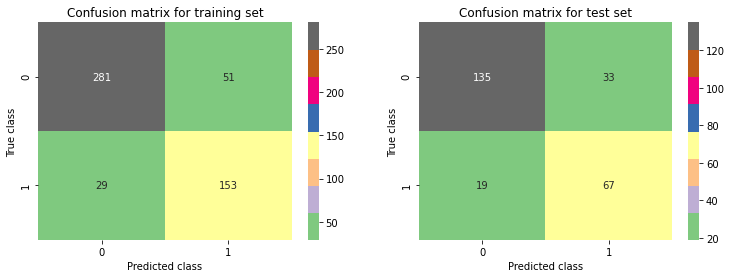

In [266]:
y_train_pred = model.predict(X_train)
train_prediction = (y_train_pred > 0.5).astype(int).reshape(X_train.shape[0])
confusion_matrix_train=sklearn.metrics.confusion_matrix(y_train, train_prediction)

y_test_pred = model.predict(X_test)
test_prediction = (y_test_pred > 0.5).astype(int).reshape(X_test.shape[0])
confusion_matrix_test=sklearn.metrics.confusion_matrix(y_test, test_prediction)

figsize(12.5,4)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1=sns.heatmap(confusion_matrix_train, annot=True, fmt='d', ax=ax1, cmap='Accent') 
ax1.set_title('Confusion matrix for training set')
ax1.set_xlabel('Predicted class')
ax1.set_ylabel('True class')

sns.heatmap(confusion_matrix_test, annot=True, fmt='d', ax=ax2, cmap='Accent')
ax2.set_title('Confusion matrix for test set')
ax2.set_xlabel('Predicted class')
ax2.set_ylabel('True class')
plt.show()


In [267]:
print(sklearn.metrics.classification_report(y_train, train_prediction))


              precision    recall  f1-score   support

           0       0.91      0.85      0.88       332
           1       0.75      0.84      0.79       182

    accuracy                           0.84       514
   macro avg       0.83      0.84      0.83       514
weighted avg       0.85      0.84      0.85       514



In [268]:
print(sklearn.metrics.classification_report(y_test, test_prediction))


              precision    recall  f1-score   support

           0       0.88      0.80      0.84       168
           1       0.67      0.78      0.72        86

    accuracy                           0.80       254
   macro avg       0.77      0.79      0.78       254
weighted avg       0.81      0.80      0.80       254



# Part 6: Conclusions

# Part 7: References

While working on this project, we occasionally use the following references. 

[1] Jack W. Smith, J.E. Everhart, W.C. Dickson, W.C. Knowler, and R.S. Johannes, <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2245318/"> Using the ADAP Learning Algorithm to Forecast the Onset of Diabetes Mellitus </a>


[2] https://www.kaggle.com/ravichaubey1506/predictive-modelling-knn-ann-xgboost

[3] Aurélien Géron, Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems, Second edition